# Predicting National CO₂ Emissions Using Economic and Energy Indicators: A Machine Learning Approach Based on Historical Global Data

- `Data Source:` https://data360.worldbank.org/en/dataset/OWID_CB


In [12]:
!pip install pandas matplotlib seaborn --q

In [13]:
# import the libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Loading & cleaning





In [14]:
# import the data
df = pd.read_csv(r"../data/owid-co2-data.csv")

In [15]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
print(f'The null values are {df.isnull().sum()}')

The null values are country                            0
year                               0
iso_code                        7929
population                      9172
gdp                            34940
                               ...  
temperature_change_from_n2o    12131
total_ghg                      12781
total_ghg_excluding_lucf       12955
trade_co2                      45656
trade_co2_share                45656
Length: 79, dtype: int64


In [17]:
# # Alternatively we can also make a Heatmap for missing values
# plt.figure(figsize=(10, 8))
# sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
# plt.title('Heatmap of Missing Values')
# plt.show()

In [18]:
# Keep only rows where 'co2' is not null
df_co2 = df[df['co2'].notna()]
df_co2.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
199,Afghanistan,1949,AFG,7356890.0,NaN,0.0,0.0,0.015,NaN,NaN,...,NaN,0.128,0.0,0.0,0.001,0.0,18.288,1.297,NaN,NaN
200,Afghanistan,1950,AFG,7776182.0,9.421400e+09,0.0,0.0,0.084,0.070,475.000,...,NaN,0.128,0.0,0.0,0.001,0.0,19.447,1.453,NaN,NaN
201,Afghanistan,1951,AFG,7879343.0,9.692280e+09,0.0,0.0,0.092,0.007,8.696,...,NaN,0.128,0.0,0.0,0.001,0.0,20.458,1.473,NaN,NaN
202,Afghanistan,1952,AFG,7987783.0,1.001733e+10,0.0,0.0,0.092,0.000,0.000,...,NaN,0.128,0.0,0.0,0.001,0.0,21.356,1.484,NaN,NaN
203,Afghanistan,1953,AFG,8096703.0,1.063052e+10,0.0,0.0,0.106,0.015,16.000,...,NaN,0.128,0.0,0.0,0.001,0.0,22.361,1.517,NaN,NaN


In [19]:
# shape and first few rows
shape = df_co2.shape
head = df_co2.head()
# Check missing values per column
missing_values = df_co2.isnull().sum().sort_values(ascending=False)

shape, head, missing_values

((29137, 79),
          country  year iso_code  population           gdp  cement_co2  \
 199  Afghanistan  1949      AFG   7356890.0           NaN         0.0   
 200  Afghanistan  1950      AFG   7776182.0  9.421400e+09         0.0   
 201  Afghanistan  1951      AFG   7879343.0  9.692280e+09         0.0   
 202  Afghanistan  1952      AFG   7987783.0  1.001733e+10         0.0   
 203  Afghanistan  1953      AFG   8096703.0  1.063052e+10         0.0   
 
      cement_co2_per_capita    co2  co2_growth_abs  co2_growth_prct  ...  \
 199                    0.0  0.015             NaN              NaN  ...   
 200                    0.0  0.084           0.070          475.000  ...   
 201                    0.0  0.092           0.007            8.696  ...   
 202                    0.0  0.092           0.000            0.000  ...   
 203                    0.0  0.106           0.015           16.000  ...   
 
      share_global_other_co2  share_of_temperature_change_from_ghg  \
 199        

## Dataset Summary:

* **Shape:** 29,137 rows × 79 columns.
* Time series data per country (country, year, iso_code).
- **Target Variable:** co2 (national CO₂ emissions).
- **Features:** Includes economic indicators (e.g., gdp), energy metrics (e.g., primary_energy_consumption), and various CO₂ sources (e.g., cement_co2, oil_co2).
- **Missing Data:** Heavy missingness in many columns, especially in other_co2_per_capita, trade_co2, energy_per_gdp, and even gdp.




## 2. Drop Columns with Too Many Missing Values (>90% missing)
- Drop the low-value or high-sparsity columns:
- These are mostly:
  - `share_global_*` columns (very sparse and niche)
  - `other_*` emissions (rarely reported)
  - `Cumulative and derived` metrics that are either unnecessary or easily recomputed.

In [20]:
# Following 7 columns are over 90%+ missing and not critical for our analysis. (Sparse/Redundant Columns)
df_co2 = df_co2.drop(columns=[
    'share_global_cumulative_other_co2',
    'share_global_other_co2',
    'other_co2_per_capita',
    'cumulative_other_co2',
    'other_industry_co2',
    'share_global_flaring_co2',
    'share_global_cumulative_flaring_co2',
])

In [21]:
# Now check Percentage of missing values per column after droping the above two
missing_percent = df_co2.isnull().mean().sort_values(ascending=False) * 100
missing_percent[missing_percent > 0]

consumption_co2_per_gdp        84.751347
trade_co2_share                84.552287
consumption_co2_per_capita     84.552287
trade_co2                      84.552287
consumption_co2                83.419707
                                 ...    
co2_per_capita                 10.141744
co2_growth_abs                  7.399526
share_global_cumulative_co2     6.208601
share_global_co2                6.208601
cumulative_co2                  6.208601
Length: 69, dtype: float64

## 3. Dropping >80% missing and not critical

In [22]:
# Drop Columns > 80% Missing
drop_cols_80 = [
    'consumption_co2_per_gdp', 'trade_co2', 'consumption_co2_per_capita',
    'trade_co2_share', 'consumption_co2'
]
#These are economic indicators. We will drop them for now and add back later if necessary.
df_co2 = df_co2.drop(columns= drop_cols_80)

## 4. Column grouping
- let's Start by organizing all 79 columns into these 7 broad categories as it will help in:
  - Structuring EDA (explore group-wise)
  - Targeted imputation (economic indicators vs emissions handled differently)
  - Feature selection (drop sparse/redundant group)
  - Model training (avoid data leakage from meta or redundant vars)

| Group                    | Description                                                |
|--------------------------|------------------------------------------------------------|
| `Meta`                   | Descriptive/ID info like country, year, iso_code           |
| `Target`                 | The column we aim to predict: `co2`                        |
| `Economic Indicators`    | GDP, population, trade, etc.                              |
| `Energy Use`             | Primary energy use and efficiency                         |
| `Emissions`              | All types: CO₂, CH₄, N₂O, GHG — total, per capita, per GDP|
| `Temperature Change`     | Temperature estimates from GHGs                           |
| `Sparse/Redundant`       | High missing %, hard to impute, or redundant              |

| Group               | Columns                                                                 |
|---------------------|-------------------------------------------------------------------------|
| **Meta**            | `country`, `year`, `iso_code`                                          |
| **Target**          | `co2`                                                                  |
| **Economic Indicators** | `gdp`, `population`, `trade_co2`, `trade_co2_share`                |
| **Energy Use**      | `primary_energy_consumption`, `energy_per_capita`, `energy_per_gdp`,<br>`co2_per_unit_energy`, `co2_including_luc_per_unit_energy` |
| **Emissions**       | `co2_growth_abs`, `co2_growth_prct`, `co2_per_capita`, `co2_per_gdp`,<br>`co2_including_luc`, `co2_including_luc_growth_abs`,<br>`co2_including_luc_growth_prct`, `co2_including_luc_per_capita`,<br>`co2_including_luc_per_gdp`, `cement_co2`, `cement_co2_per_capita`,<br>`coal_co2`, `coal_co2_per_capita`, `flaring_co2`, `flaring_co2_per_capita`,<br>`gas_co2`, `gas_co2_per_capita`, `oil_co2`, `oil_co2_per_capita`,<br>`land_use_change_co2`, `land_use_change_co2_per_capita`,<br>`consumption_co2`, `consumption_co2_per_capita`, `consumption_co2_per_gdp`,<br>`ghg_excluding_lucf_per_capita`, `ghg_per_capita`, `methane`,<br>`methane_per_capita`, `nitrous_oxide`, `nitrous_oxide_per_capita`,<br>`total_ghg`, `total_ghg_excluding_lucf` |
| **Temperature Change** | `temperature_change_from_co2`, `temperature_change_from_ch4`,<br>`temperature_change_from_n2o`, `temperature_change_from_ghg`,<br>`share_of_temperature_change_from_ghg` |
| **Sparse/Redundant** | All `cumulative_*` columns,<br>All `share_global_*` columns,<br>`other_co2_per_capita`, `other_industry_co2` |

In [23]:
meta_cols = ['country', 'year', 'iso_code']
target_col = ['co2']

economic_cols = ['gdp', 'population', 'trade_co2', 'trade_co2_share']
energy_cols = ['primary_energy_consumption', 'energy_per_capita', 'energy_per_gdp',
                  'co2_per_unit_energy', 'co2_including_luc_per_unit_energy']
emission_cols = [
    'co2_growth_abs', 'co2_growth_prct', 'co2_per_capita', 'co2_per_gdp',
    'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct',
    'co2_including_luc_per_capita', 'co2_including_luc_per_gdp',
    'cement_co2', 'cement_co2_per_capita', 'coal_co2', 'coal_co2_per_capita',
    'flaring_co2', 'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita',
    'oil_co2', 'oil_co2_per_capita', 'land_use_change_co2', 'land_use_change_co2_per_capita',
    'consumption_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp',
    'ghg_excluding_lucf_per_capita', 'ghg_per_capita', 'methane', 'methane_per_capita',
    'nitrous_oxide', 'nitrous_oxide_per_capita', 'total_ghg', 'total_ghg_excluding_lucf'
]
temp_change_cols = [
    'temperature_change_from_co2', 'temperature_change_from_ch4', 'temperature_change_from_n2o',
    'temperature_change_from_ghg', 'share_of_temperature_change_from_ghg'
]


In [24]:
column_groups = {
    "Meta": meta_cols,
    "Target": target_col,
    "Economic": economic_cols,
    "Energy": energy_cols,
    "Emissions": emission_cols,
    "Temperature Change": temp_change_cols
}


## 5. Exploratory Data Analysis (EDA)
We’ll explore the **Target** and **key features** visually to:
- Understand trends
- Spot outliers
- Guide imputation and modeling

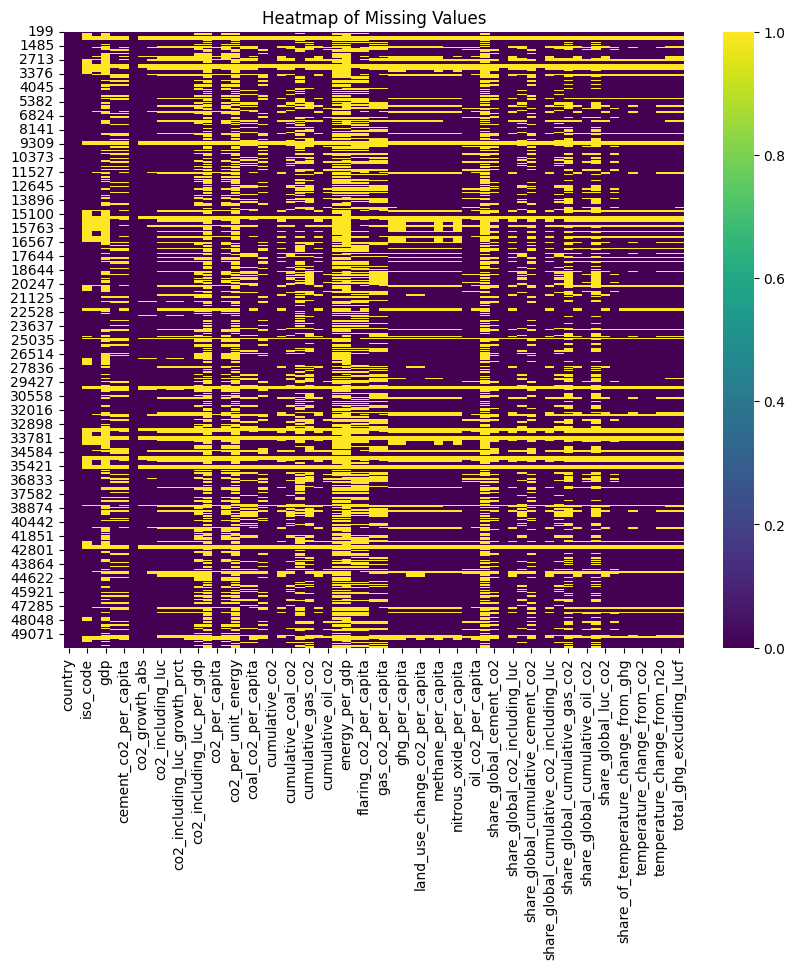

In [25]:
# makes a Heatmap for missing values
plt.figure(figsize=(10, 8))
sns.heatmap(df_co2.isnull(), cbar=True, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

### 5.1 Basic Trend of Global CO₂ Over Time

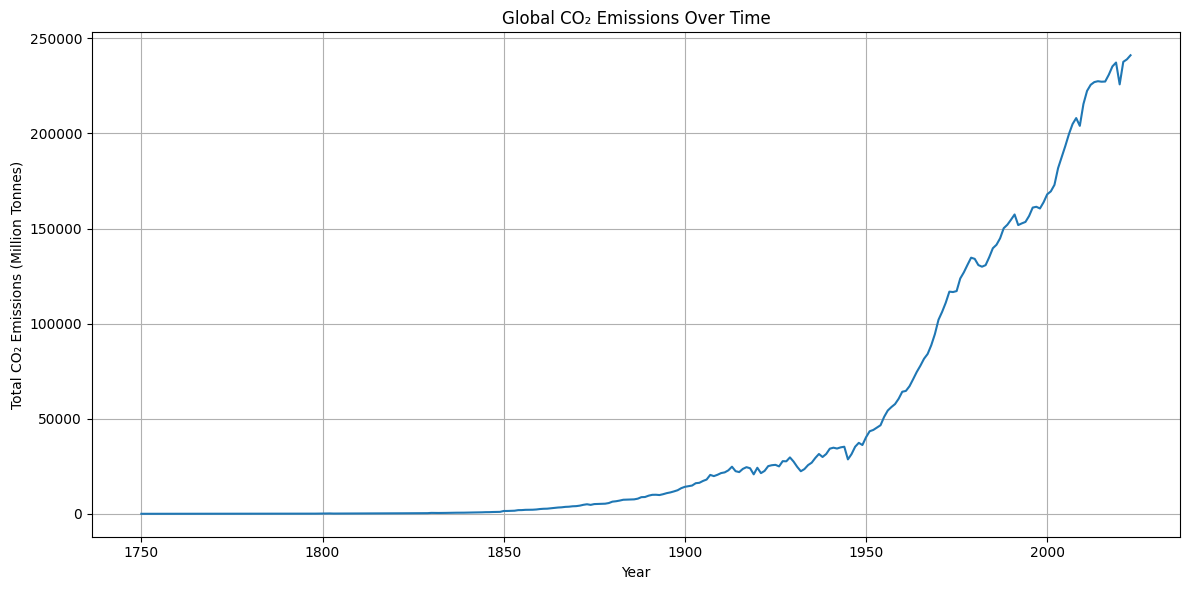

In [26]:
# Aggregate global CO₂ by year
global_co2_by_year = df_co2.groupby('year')['co2'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=global_co2_by_year)
plt.title('Global CO₂ Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Total CO₂ Emissions (Million Tonnes)')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Inferences on Global CO₂ Emission Trends (1750–2023)

##### 1. Long-term Exponential Growth
From 1750 to 1850, global CO₂ emissions increased slowly and steadily, reflecting early industrial activities.

- **1750**: ~56 million tons  
- **1850**: ~1,535 million tons  
- From the mid-19th century onward, there’s a sharp exponential rise:  
  - **1900**: ~14,238 million tons  
  - **1950**: ~40,299 million tons  
  - **2000**: ~168,010 million tons  
  - **2023**: ~241,117 million tons  

##### 2. Industrial Revolution Impact
- A noticeable acceleration begins around 1850–1900, corresponding to the Second Industrial Revolution, with widespread use of fossil fuels (coal, oil).

##### 3. World Wars and Great Depression
Emissions dip or stagnate around:
- **1914-1918** (World War I)  
- **1929–1932** (Great Depression)  
- **1939–1945** (World War II)  
These reflect reduced industrial activity.

##### 4. Post-WWII Economic Boom
- Massive surge after 1950, with rapid industrialization, especially in:
  - US
  - Europe
  - Japan
  - Later China and India

##### 5. Late 20th Century Stabilization
- Growth is moderately steady from the 1980s to early 2000s  
- Some plateauing due to:
  - Energy efficiency improvements  
  - Renewables adoption  
  - Policies in developed nations  

##### 6. COVID-19 Dip
- Distinct drop in 2020 due to global lockdowns:
  - **2019**: ~237,289 million tons  
  - **2020**: ~225,816 million tons  
- Rebounded in 2021–2023, surpassing pre-pandemic levels

##### 7. Recent Years (2020s)
- Emissions reached historical peak in 2023  
- Despite climate agreements like the Paris Accord, emissions continue rising  

---

##### **Summary:**
> "Global CO₂ emissions have grown from under 60 million tons in 1750 to over 240,000 million tons in 2023, following an exponential trend, with major accelerations post-industrial revolutions and dips during global crises. The recent rebound after COVID-19 shows ongoing dependence on fossil fuels."

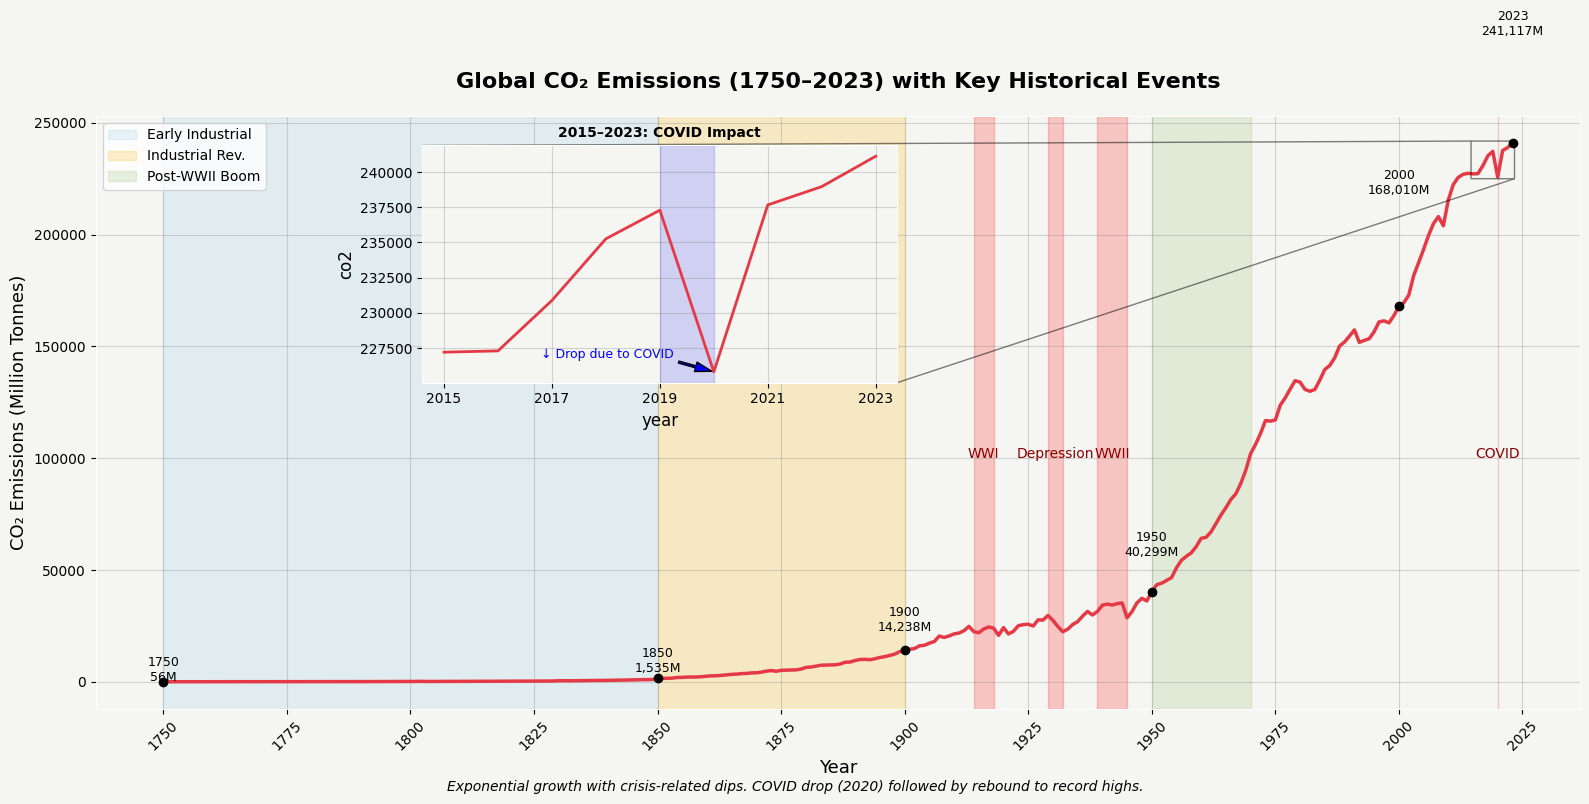

In [ ]:
global_co2_by_year = df_co2.groupby('year')['co2'].sum()

plt.style.use('default')
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'axes.facecolor': '#f5f5f2',
    'figure.facecolor': '#f5f5f2',
    'axes.edgecolor': 'white',
    'grid.color': 'grey',
    'grid.alpha': 0.2,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'axes.titleweight': 'bold'
})

plt.figure(figsize=(16, 8))
ax = plt.gca()

# Main CO₂ Line Plot
sns.lineplot(data=global_co2_by_year, color='#e63946', linewidth=2.5, ax=ax)

# Historical Periods
plt.axvspan(1750, 1850, color='#8ecae6', alpha=0.2, label='Early Industrial')
plt.axvspan(1850, 1900, color='#ffb703', alpha=0.2, label='Industrial Rev.')
plt.axvspan(1950, 1970, color='#90be6d', alpha=0.2, label='Post-WWII Boom')

# Major Crises
crisis_data = [
    {'years': (1914, 1918), 'label': 'WWI'},
    {'years': (1929, 1932), 'label': 'Depression'},
    {'years': (1939, 1945), 'label': 'WWII'},
    {'years': (2020, 2020), 'label': 'COVID'}
]

for crisis in crisis_data:
    plt.axvspan(*crisis['years'], color='red', alpha=0.2)
    mid_year = sum(crisis['years']) / 2
    plt.text(mid_year, 100000, crisis['label'],
             ha='center', fontsize=10, color='darkred')

# Key Milestone Points
key_points = {
    1750: {'y': 56, 'ytext': 3.6},
    1850: {'y': 1535, 'ytext': 2.8},
    1900: {'y': 14238, 'ytext': 1.6},
    1950: {'y': 40299, 'ytext': 1.4},
    2000: {'y': 168010, 'ytext': 1.3},
    2023: {'y': 241117, 'ytext': 1.2}
}

for year, data in key_points.items():
    plt.scatter(year, data['y'], color='black', zorder=5)
    plt.text(year, data['y'] * data['ytext'],
             f'{year}\n{data["y"]:,.0f}M',
             ha='center', fontsize=9, color='black')

# Inset Zoom Box for 2015–2023
# inset_axes([x, y, width, height])
# ax_inset = ax.inset_axes([0.58, 0.5, 0.37, 0.4])
# # Move inset left and down slightly
ax_inset = ax.inset_axes([0.22, 0.55, 0.32, 0.4])

sns.lineplot(data=global_co2_by_year.loc[2015:2023], color='#e63946',
             linewidth=2, ax=ax_inset)
ax_inset.set_title('2015–2023: COVID Impact', fontsize=10)
ax_inset.grid(True, alpha=0.3)
ax_inset.set_xticks(range(2015, 2024, 2))

# To Highlight 2019–2020 Drop
ax_inset.axvspan(2019, 2020, color='blue', alpha=0.15, label='Drop')
ax_inset.annotate('↓ Drop due to COVID',
                  xy=(2020, global_co2_by_year.loc[2020]),
                  xytext=(2016.8, global_co2_by_year.loc[2020] + 1000),
                  arrowprops=dict(facecolor='blue', shrink=0.05, width=1.5, headwidth=7),
                  fontsize=9, color='blue')

# Link inset to main plot
ax.indicate_inset_zoom(ax_inset, edgecolor="black")

# Final Styling
plt.title('Global CO₂ Emissions (1750–2023) with Key Historical Events',
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Year', fontsize=13)
plt.ylabel('CO₂ Emissions (Million Tonnes)', fontsize=13)
plt.xticks(range(1750, 2026, 25), rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', frameon=True, facecolor='white')

# Caption
plt.figtext(0.5, 0.001,
            "Exponential growth with crisis-related dips. COVID drop (2020) followed by rebound to record highs.",
            ha="center", fontsize=10, style='italic')

plt.tight_layout()
# plt.savefig('Global CO₂ Emissions (1750–2023) with Key Historical Events.png', dpi=600, bbox_inches='tight', format='png')
plt.show()



### 5.2 Top CO₂ Emitting Countries (Most Recent Year)

/tmp/ipykernel_14971/3544862897.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_emitters, x='co2', y='country', palette='Reds_r')


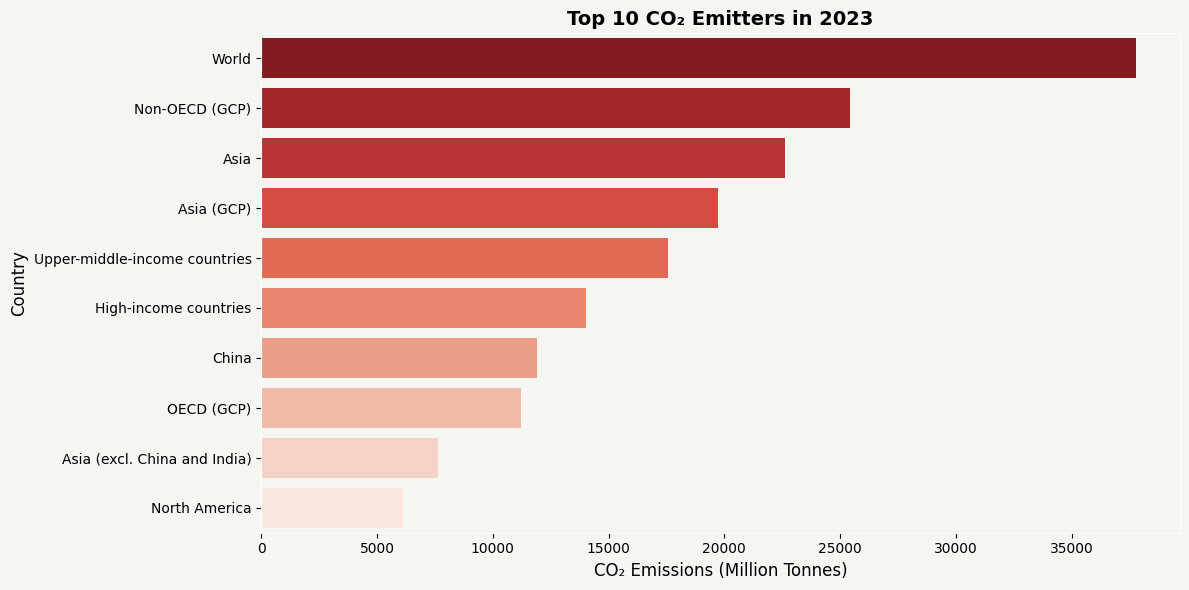

In [28]:
# Get most recent year in data
latest_year = df_co2['year'].max()

# Filter data for that year and sort
top_emitters = df_co2[df_co2['year'] == latest_year].sort_values(by='co2', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_emitters, x='co2', y='country', palette='Reds_r')
plt.title(f'Top 10 CO₂ Emitters in {latest_year}')
plt.xlabel('CO₂ Emissions (Million Tonnes)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


/tmp/ipykernel_14971/1568413383.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='co2', y='country', data=top_co2, palette='Reds_r', ax=ax1)
/tmp/ipykernel_14971/1568413383.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='co2_per_capita', y='country', data=top_per_capita, palette='Blues_r', ax=ax2)


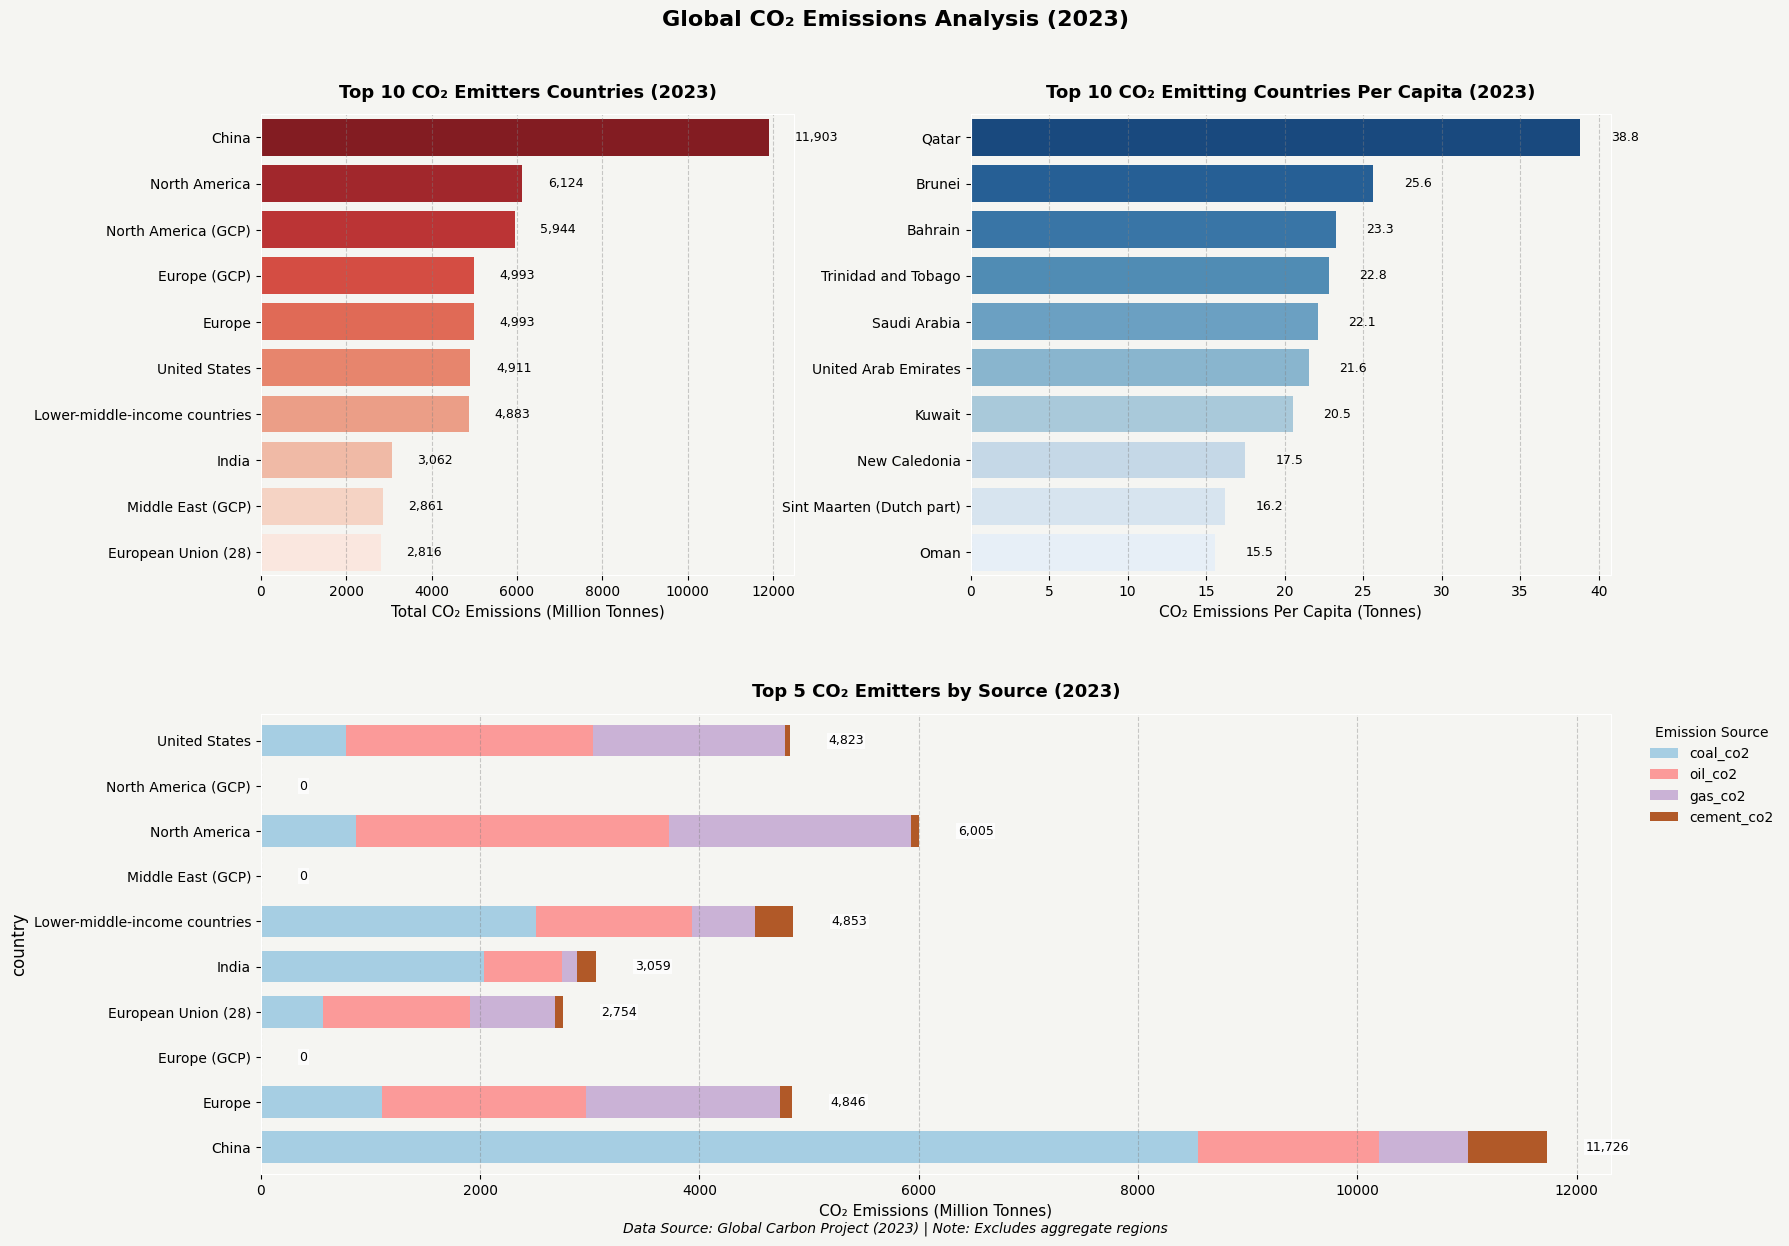

In [29]:

# Step 1: Filter for 2023 and drop aggregate regions
exclude_list = [
    "World", "Asia", "Non-OECD (GCP)", "Asia (GCP)",
    "Upper-middle-income countries", "High-income countries",
    "OECD (GCP)", "Asia (excl. China and India)"
]
data_2023 = df_co2[(df_co2['year'] == 2023) & (~df_co2['country'].isin(exclude_list))]

# Step 2: Top 10 Countries by Total CO2
top_co2 = data_2023[['country', 'co2']].dropna().sort_values(by='co2', ascending=False).head(10)

# Step 3: Top 10 Countries by CO2 Per Capita
top_per_capita = data_2023[['country', 'co2_per_capita']].dropna().sort_values(by='co2_per_capita', ascending=False).head(10)

# Step 4: Stacked Bar Plot - Emissions by Source for Top 5
top5_countries = top_co2['country'].values
subset = data_2023[data_2023['country'].isin(top5_countries)]
# Selecting relevant emission sources
subset = subset[['country', 'coal_co2', 'oil_co2', 'gas_co2', 'cement_co2']]
subset = subset.set_index('country')

# Set up the figure and subplots
plt.figure(figsize=(18, 12))
plt.suptitle('Global CO₂ Emissions Analysis (2023)', fontsize=16, fontweight='bold', y=1.02)

# Create gridspec for custom layout
gs = plt.GridSpec(2, 2, width_ratios=[1, 1.2], height_ratios=[1, 1])

# Common style parameters
grid_params = {'axis': 'x', 'linestyle': '--', 'alpha': 0.4}
label_params = {'fontsize': 11}
title_params = {'fontsize': 13, 'pad': 12}

# ===== Plot 1: Top 10 Total CO₂ =====
ax1 = plt.subplot(gs[0, 0])
sns.barplot(x='co2', y='country', data=top_co2, palette='Reds_r', ax=ax1)
ax1.set_xlabel('Total CO₂ Emissions (Million Tonnes)', **label_params)
ax1.set_ylabel('')
ax1.set_title('Top 10 CO₂ Emitters Countries (2023)', **title_params)
ax1.grid(**grid_params)

# Add value labels
for p in ax1.patches:
    width = p.get_width()
    ax1.text(width + 0.05*max(top_co2['co2']),
             p.get_y() + p.get_height()/2,
             f'{width:,.0f}',
             ha='left', va='center', fontsize=9)

# ===== Plot 2: Top 10 Per Capita CO₂ =====
ax2 = plt.subplot(gs[0, 1])
sns.barplot(x='co2_per_capita', y='country', data=top_per_capita, palette='Blues_r', ax=ax2)
ax2.set_xlabel('CO₂ Emissions Per Capita (Tonnes)', **label_params)
ax2.set_ylabel('')
ax2.set_title('Top 10 CO₂ Emitting Countries Per Capita (2023)', **title_params)
ax2.grid(**grid_params)

# Add value labels
for p in ax2.patches:
    width = p.get_width()
    ax2.text(width + 0.05*max(top_per_capita['co2_per_capita']),
             p.get_y() + p.get_height()/2,
             f'{width:,.1f}',
             ha='left', va='center', fontsize=9)

# ===== Plot 3: Emission Sources for Top 5 =====
ax3 = plt.subplot(gs[1, :])
subset.plot(kind='barh', stacked=True,
            colormap='Paired',
            ax=ax3,
            width=0.7)
ax3.set_xlabel('CO₂ Emissions (Million Tonnes)', **label_params)
ax3.set_title('Top 5 CO₂ Emitters by Source (2023)', **title_params)
ax3.grid(**grid_params)
ax3.legend(title='Emission Source',
           bbox_to_anchor=(1.02, 1),
           loc='upper left',
           frameon=False)

# Add total value labels
for i, (idx, row) in enumerate(subset.iterrows()):
    total = row.sum()
    ax3.text(total + 0.03*subset.sum(axis=1).max(),
             i,
             f'{total:,.0f}',
             va='center',
             fontsize=9,
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=1))

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Add data source/caption
plt.figtext(0.5, 0.001,
            "Data Source: Global Carbon Project (2023) | Note: Excludes aggregate regions",
            ha="center",
            fontsize=10,
            style='italic')
# plt.savefig('Global CO₂ Emissions Analysis (2023).png', dpi=600, bbox_inches='tight', format='png')
plt.show()

### 5.3 Correlation Heatmap of Numeric Features

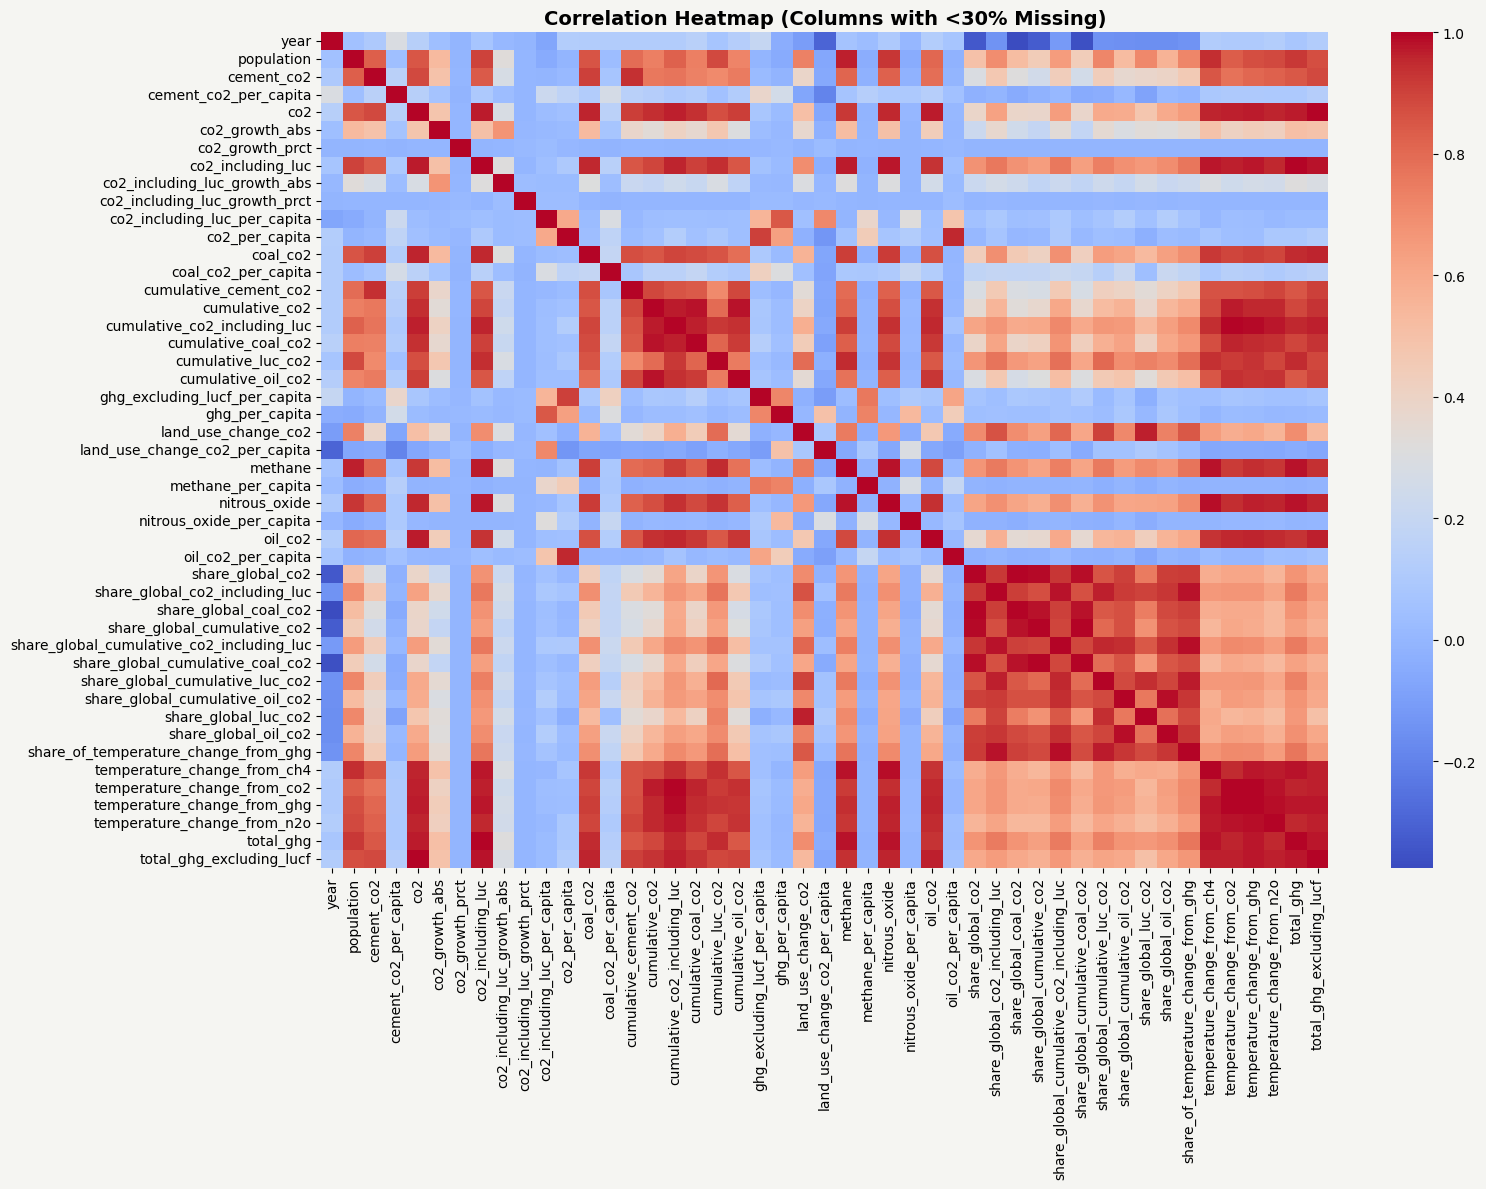

In [30]:
# Select numeric columns with <30% missing for meaningful correlation
num_cols = df_co2.select_dtypes(include='number').columns
filtered_cols = [col for col in num_cols if df_co2[col].isna().mean() < 0.3]

plt.figure(figsize=(16, 12))
sns.heatmap(df_co2[filtered_cols].corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap (Columns with <30% Missing)')
plt.tight_layout()
plt.show()

#### **Comprehensive CO₂ & GHG Emissions Correlation Insights**

| Variable Pair                     | Correlation (r) | Interpretation                                                                 | Policy/Tech Implications                                                                 | Priority Level |
|-----------------------------------|-----------------|--------------------------------------------------------------------------------|------------------------------------------------------------------------------------------|----------------|
| **Population ↔ Total CO₂**        | 0.85            | Larger populations drive higher absolute emissions.                            | Focus on decoupling emissions from population growth via clean energy and efficiency.    | Medium         |
| **Population ↔ Methane**          | 0.96            | Population growth strongly linked to methane (agriculture/waste).              | Target methane leaks (oil/gas) and livestock/rice farming practices.                    | High           |
| **Coal CO₂ ↔ Total CO₂**          | 0.96            | Coal is the dominant contributor to national CO₂ emissions.                    | Accelerate coal phaseouts; scale renewables and grid storage.                            | **Critical**   |
| **Oil CO₂ ↔ Total CO₂**           | 0.97            | Oil is equally impactful as coal in driving emissions (transport/industry).    | Electrify transport; incentivize green hydrogen for industry.                            | **Critical**   |
| **Cement CO₂ ↔ Coal CO₂**         | 0.91            | Cement production heavily reliant on coal energy.                               | Promote low-carbon cement (e.g., CCS, limestone alternatives).                           | High           |
| **Land Use CO₂ ↔ Population**     | -0.07           | Land use emissions (deforestation) are decoupled from population.              | Protect forests; enforce sustainable agriculture policies.                              | Medium         |
| **CO₂ per capita ↔ GHG per capita** | 0.90          | CO₂ is the primary component of per capita greenhouse gas (GHG) emissions.                      | Tax high per capita emitters; shift wealthy economies to circular models.                | High           |
| **Methane ↔ Nitrous Oxide**       | 0.98            | Agricultural systems emit both gases (e.g., fertilizers, livestock).           | Integrate methane and N₂O reduction in farming (precision agriculture, feed additives).  | Medium         |
| **Cumulative CO₂ ↔ Cumulative Coal** | 0.98        | Historical coal use drives long-term climate liability.                         | Climate reparations/funding for developing nations to leapfrog coal.                     | **Critical**   |
| **Temp Change ↔ CO₂**             | 0.97            | CO₂ is the strongest driver of warming.                                        | Prioritize CO₂ drawdown (reforestation, DAC) alongside emissions cuts.                   | **Critical**   |
| **Temp Change ↔ Methane**         | 0.12            | Methane's short-term warming impact is underrepresented in correlations.       | Urgent methane mitigation (e.g., satellite monitoring of leaks).                         | High           |

### **Imp**
1. **Fossil Fuels Dominate**: Coal and oil are the top levers for emission reductions (`r > 0.95`).
2. **Population ≠ Destiny**: Per capita emissions vary widely; technology and policy matter more than headcount.
3. **Industrial Sectors Need Innovation**: Cement (`r = 0.91` with coal) and agriculture (methane/N₂O) require targeted solutions.
4. **Land Use is Unique**: Deforestation emissions operate independently (`r = -0.07`), offering standalone mitigation opportunities.

#### **Priority Actions**
- **Critical**: Coal/oil phaseout, CO₂ drawdown.
- **High**: Methane mitigation, cement decarbonization.
- **Medium**: Sustainable land use, population-emission decoupling.


### 5.4 CO₂ vs GDP Scatter Plot (All Years)

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_co2, x='gdp', y='co2', hue='year', palette='viridis', alpha=0.7)
plt.title('CO₂ Emissions vs GDP')
plt.xlabel('GDP (constant 2015 US$)')
plt.ylabel('CO₂ Emissions')
plt.xscale('log')  # GDP has large scale differences
plt.yscale('log')  # CO₂ too
plt.legend(title='Year')
# plt.legend([],[], frameon=False)  # To suppress legend if too many years
plt.grid(True)
plt.tight_layout()
# plt.savefig('CO₂ Emissions vs GDP.png', dpi=600, bbox_inches='tight', format='png')
plt.show()


### 5.5 CO₂ Emissions Trends Over Time (for Key Countries)

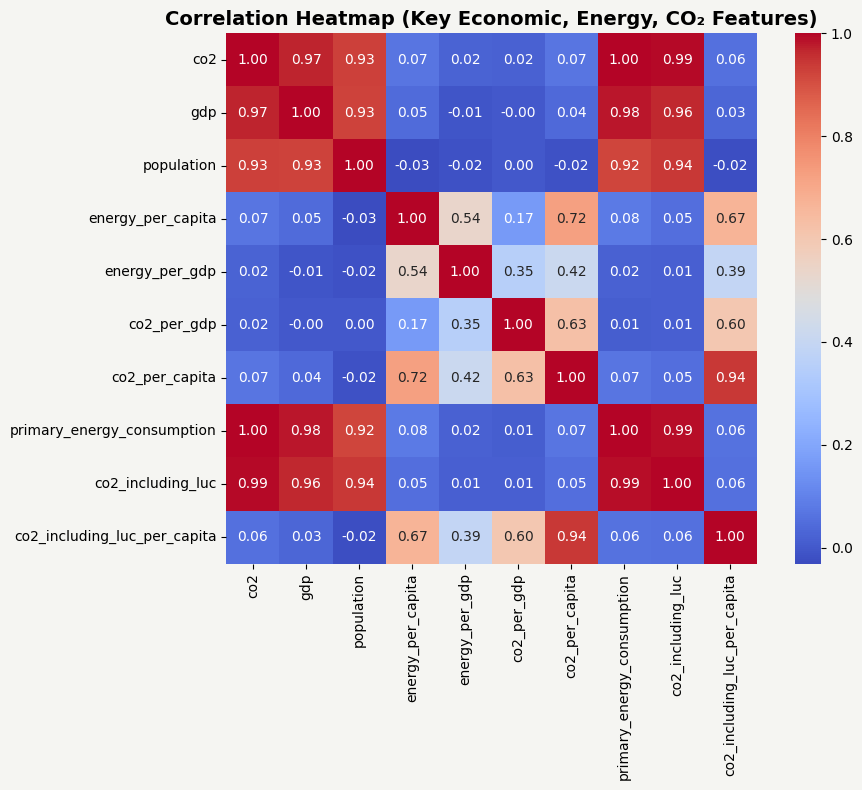

In [ ]:
# Selected relevant economic + energy + emission columns
grouped_columns = [
    'co2', 'gdp', 'population', 'energy_per_capita', 'energy_per_gdp',
    'co2_per_gdp', 'co2_per_capita', 'primary_energy_consumption',
    'co2_including_luc', 'co2_including_luc_per_capita'
]

# Drop rows with NA in these columns to compute correlations
df_corr = df_co2[grouped_columns].dropna()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap (Key Economic, Energy, CO₂ Features)')
plt.tight_layout()
plt.show()


#### CO₂ Emissions Correlation Insights

| Relationship                          | Correlation (r) | Interpretation                                                                 |
|---------------------------------------|-----------------|-------------------------------------------------------------------------------|
| **CO₂ ↔ GDP**                         | 0.97            | Strong coupling between economic growth and emissions                         |
| **CO₂ ↔ Primary Energy Consumption**  | 0.997           | Energy systems remain heavily carbon-intensive                                |
| **CO₂ ↔ CO₂ (incl. land use)**        | 0.993           | Land use changes amplify but don't dominate emission trends                   |
| **GDP ↔ Primary Energy**              | 0.98            | Wealthier economies consume more energy                                       |
| **Energy per capita ↔ CO₂ per capita**| 0.72            | Higher individual energy use = higher emissions, but not 1:1                  |
| **Population ↔ CO₂**                  | 0.93            | Population growth drives emissions, but less than GDP                         |
| **Energy per GDP ↔ CO₂ per GDP**      | 0.35            | Weak link between energy efficiency and emission intensity                    |
| **Population ↔ Energy per capita**    | -0.03           | Larger populations don't necessarily use more energy per person               |
| **GDP ↔ Energy per GDP**              | -0.008          | Wealth doesn't guarantee energy efficiency                                    |
| **CO₂ per capita ↔ Population**       | -0.02           | Per capita emissions are policy/tech-driven                                   |

### Insights

1. **GDP-Emissions Lock-In**  
   - The 0.97 correlation shows fossil fuel dependence is systemic in economic growth

2. **Energy Mix Critical**  
   - Primary energy's 0.997 link to CO₂ demands clean energy transitions

3. **Per Capita Dynamics**  
   - High emitters (0.72 correlation between energy and CO₂ per capita) need targeting
   - Weak population links suggest solutions aren't about population control

4. **Efficiency Gaps**  
   - Low 0.35 correlation between energy/GDP and CO₂/GDP reveals wasted energy

### Recommended Actions

- **Decouple GDP & CO₂** through carbon pricing and green industrialization  
- **Transform Energy Systems** by scaling renewables and phasing out coal  
- **Target High Emitters** where energy use drives per capita emissions  
- **Improve Efficiency** with stricter mandates for industrial systems  

*Note: Global aggregate data - regional patterns may vary*

## 6. Missing Value Handling (Imputation)

In [23]:
df_co2 = df_co2.dropna(subset=['co2'])

### 6.2 Country-wise Interpolation for Time-Series Features

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

# Sort before interpolation
df_co2 = df_co2.sort_values(by=['country', 'year'])

# List of columns for interpolation (we can expand this based on importance)
interp_cols = [
    'gdp', 'population', 'primary_energy_consumption', 'energy_per_capita',
    'energy_per_gdp', 'co2_per_gdp', 'co2_per_capita', 'co2_including_luc',
    'co2_including_luc_per_capita'
]

# Group-wise interpolation
df_co2[interp_cols] = df_co2.groupby('country')[interp_cols].transform(lambda grp: grp.interpolate(method='linear', limit_direction='both'))
# fill any remaining using IterativeImputer
numeric_cols = df_co2.select_dtypes(include='number').columns
# Standardize the features (important for IterativeImputer)
scaler = StandardScaler()
scaled = scaler.fit_transform(df_co2[numeric_cols])

imp = IterativeImputer(random_state=0)
imputed = imp.fit_transform(scaled)

# Replace the imputed values back into the DataFrame
df_co2[numeric_cols] = scaler.inverse_transform(imputed)

c:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


#### Why Interpolation is Suitable for This Dataset

| Reason                          | Explanation |
|---------------------------------|-------------|
| **1. Natural Time Progression** | Most indicators (like `gdp`, `co2`, `population`) follow a continuous temporal trend for each country. Interpolation preserves this smooth progression over time. |
| **2. Country-specific patterns** | Missing values often appear within a time series of a single country. Using `groupby(country).interpolate()` keeps imputations realistic and country-specific. |
| **3. Avoids bias across countries** | Methods like `SimpleImputer(strategy='mean')` might mix data from unrelated countries, introducing geographic/temporal bias. |
| **4. No overfitting risk** | Interpolation is purely based on time-wise patterns; it avoids leaking information from other rows or future data. |

#### Key Benefits:
- Preserves **temporal continuity** within each country's data
- Maintains **country-specific trends** without artificial smoothing
- More accurate than global imputation for **time-series data**

## 7. Splitting Data

In [25]:
from sklearn.model_selection import train_test_split

# features and target
X = df_co2.drop(columns=['co2'])
y = df_co2['co2']

# Random split: 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test   = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")


Train: (20395, 66), Validation: (4371, 66), Test: (4371, 66)


## 8. Feature Scaling/Normalization
- Apply `QuantileTransformer` **only** on `X_train` (fit_transform) and **transform on val/test**.
- This prevents the leakage of data and also the false results.

In [26]:
from sklearn.preprocessing import QuantileTransformer
from scipy.stats import skew

# Get numeric columns again
num_cols = X_train.select_dtypes(include='number').columns

# Fit QuantileTransformer only on training data
qt = QuantileTransformer(output_distribution='normal', random_state=42)
X_train_scaled = qt.fit_transform(X_train[num_cols])
X_val_scaled = qt.transform(X_val[num_cols])
X_test_scaled = qt.transform(X_test[num_cols])

# Convert back to DataFrames (to preserve column names)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_cols, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=num_cols, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_cols, index=X_test.index)

# Replace in your full feature sets
X_train.update(X_train_scaled)
X_val.update(X_val_scaled)
X_test.update(X_test_scaled)

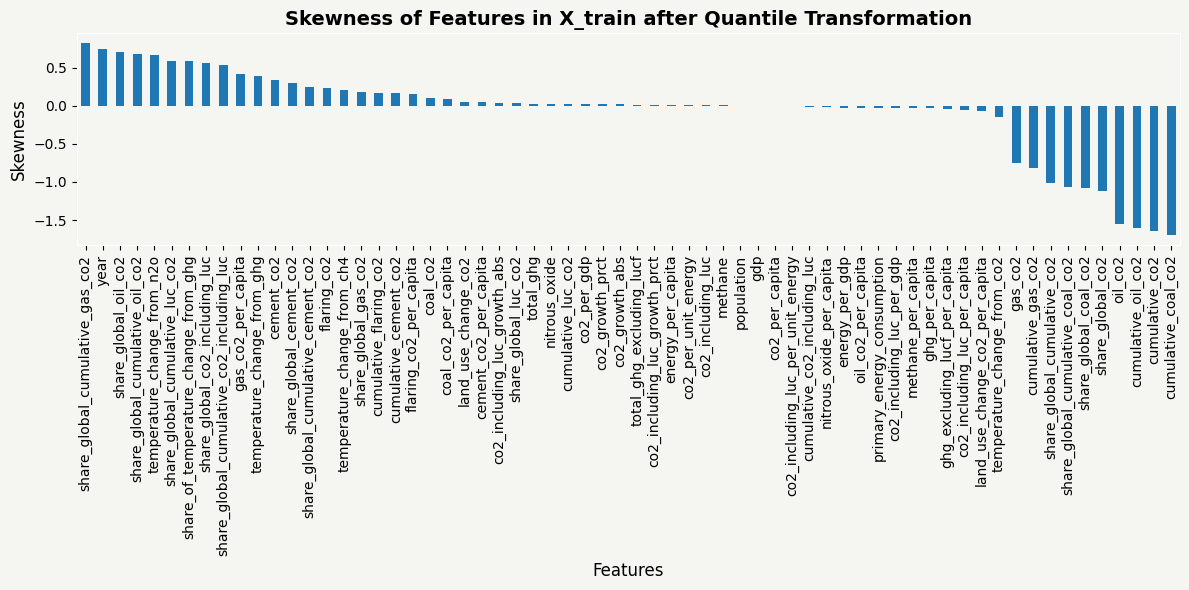

In [27]:
# Plot skewness of scaled training features
plt.figure(figsize=(12, 6))
# Calculate skewness again after scaling
skewness_after_scaling = X_train_scaled.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness_after_scaling.plot(kind='bar')
plt.title('Skewness of Features in X_train after Quantile Transformation')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Skewness of Features in X_train after Quantile Transformation.png', dpi=600, bbox_inches='tight', format='png')
plt.show()

# print("\nSkewness of features after Quantile Transformation:")
# print(skewness_after_scaling.to_string())

#### Skewness Analysis of Features

- Majority of features now have skewness between -1 and +1  
- This range is generally acceptable for most ML models  
- Particularly **suitable for** tree-based models (`Random Forest`, `Gradient Boosting`)

**A few Outliers:**
- `cumulative_*` features  
- `share_global_*` features  
- `gas_co2, oil_co2`, etc.  
These are cumulative measures - **naturally long-tailed**. They are **less concerning** unless using models very sensitive to input distribution (like linear regression or k-NN).

#### When to Scale Target Variable (y)?

##### Models Sensitive to Scale/Distribution:
- **Linear Regression**  
- **Ridge/Lasso Regression**  
- **Support Vector Machines (SVR)**  
- **Neural Networks**  

**Why Scale?**  
These models rely on distances/gradients. Scaling improves:  
- Performance  
- Training stability  
- Convergence speed  

##### Models Not Sensitive to Scale/Distribution:  
- **Decision Trees**  
- **Random Forests**  
- **XGBoost/LightGBM**  

**Why Not Scale?**  
- Tree-based models split on feature values - unaffected by target magnitude.  
Scaling adds complexity without benefits.

## 9. Feature Engineering

### 9.1 Correlation Analysis on `X_train_scaled Only`

In [28]:
# Uses only numeric columns in X_train_scaled so applying on X_train_scaled as it contains numeric only
X_corr = X_train_scaled.copy()

# Compute correlation matrix
corr_matrix = X_corr.corr().abs()

# Upper triangle
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Features with high correlation
to_drop_corr = [col for col in upper.columns if any(upper[col] > 0.90)]

print(f"Highly correlated features in scaled training data: {to_drop_corr} and {len(to_drop_corr)}")

Highly correlated features in scaled training data: ['gas_co2', 'oil_co2', 'share_global_co2_including_luc', 'share_global_cumulative_cement_co2', 'share_global_luc_co2', 'share_global_oil_co2', 'total_ghg'] and 7


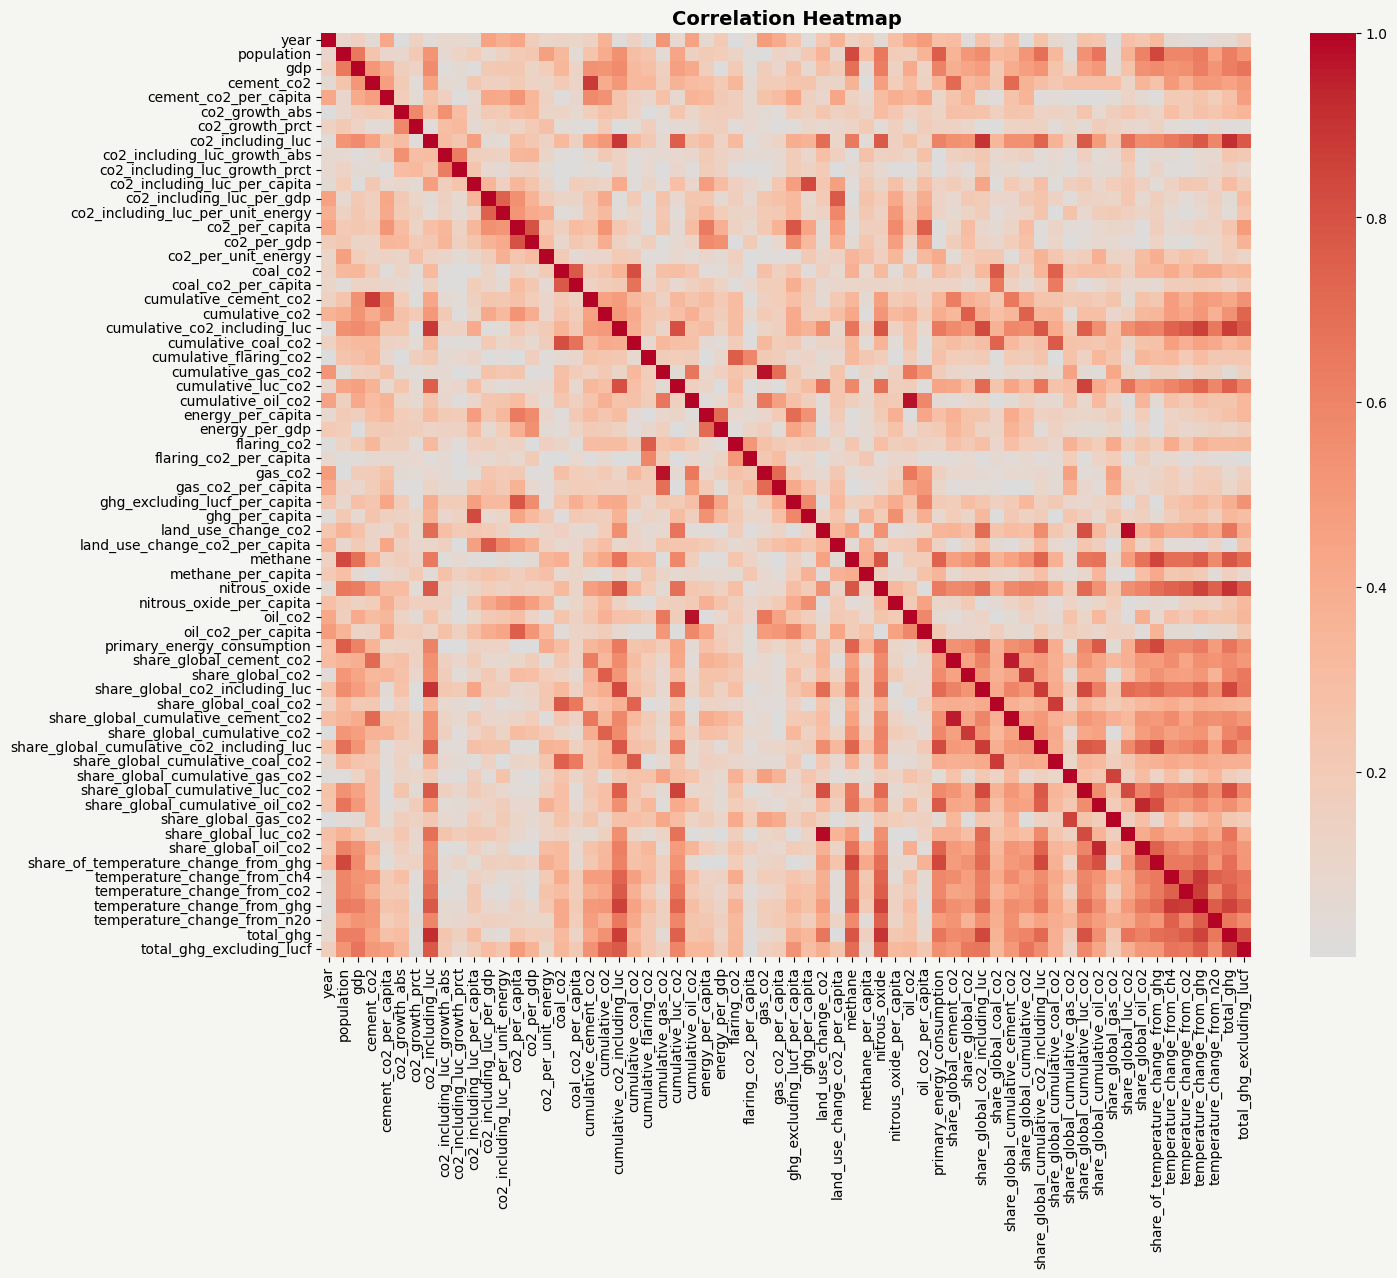

In [29]:
# Plot heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

#### Extremely High Correlations (r > 0.90)
**Feature Correlation Analysis**

1. **`gas_co2` ↔ `cumulative_gas_co2`** (**0.972**)  
   - **Drop**: `gas_co2` (keep cumulative for long-term trends)

2. **`oil_co2` ↔ `cumulative_oil_co2`** (**0.975**)  
   - **Drop**: `oil_co2` (cumulative shows all-time impact)

3. **`share_global_co2_including_luc` ↔ `total_ghg`** (**0.920**)  
   - **Drop**: `share_global_co2_including_luc` (keep comprehensive GHG metric)

4. **`share_global_cumulative_cement_co2` ↔ `cumulative_cement_co2`** (**0.879**)  
   - **Drop**: Share version (absolute values are policy-actionable)

5. **`share_global_luc_co2` ↔ `land_use_change_co2`** (**0.989**)  
   - **Drop**: Share metric (raw emissions are more interpretable)

6. **`share_global_oil_co2` ↔ `cumulative_oil_co2`** (**0.935**)  
   - **Drop**: Share version (absolute emissions preferred)

7. **`total_ghg` ↔ `co2_including_luc`** (**0.920**)  
   - **Revised Action**: Keep `total_ghg`, drop `co2_including_luc` (more complete)

### 9.2 Drop Correlated Features — Only `from X_train_scaled` (and `same from val/test`)

In [30]:
# Dropping them from all three sets
X_train_scaled.drop(columns=to_drop_corr, inplace=True)
X_val_scaled.drop(columns=to_drop_corr, inplace=True)
X_test_scaled.drop(columns=to_drop_corr, inplace=True)

#### **Questions that may arise in your mind**
1. Original data in X_train/test/val: 66 columns total
2. After `select_dtypes(include='number')`: 64 numeric columns
3. After scaling and updating: Back to 66 columns
4. After dropping 7 correlated features: 57 columns (64-7) in scaled sets

**`Why Not update` the original `X_train/X_val/X_test` sets after dropping features like we `did in Feature scaling` step?**
### Columns in Question
| Column     | Type    | Example Values       |
|------------|---------|----------------------|
| `country`  | String  | "Afghanistan", "USA" |
| `iso_code` | String  | "AFG", "USA"         |

Above two columns are Identifier columns.
- **Identifier columns**, not meaningful features
- **ML models require numeric inputs** (categorical would need one-hot encoding)
- **Problems if encoded**:
  - 200+ countries → huge sparse matrix
  - Risk of overfitting
  - No meaningful patterns to learn from names/codes
  - So, we will use `X_train_scaled` for modeling

**When Are They Useful?**
- For `EDA` / `grouping` / `plotting`
- For `post-model interpretation` (e.g., show which countries are mispredicted)
- For building separate models per region, if needed
- Not directly for supervised modeling


## 10. Baseline Model Training & Evaluation

In [31]:
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Model Evaluation function
def evaluate_model(name, model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    preds = model.predict(X_val)

    r2 = r2_score(y_val, preds)
    mae = mean_absolute_error(y_val, preds)
    rmse = np.sqrt(mean_squared_error(y_val, preds))

    print(f"{name} Performance:")
    print(f"  R² Score : {r2:.4f}")
    print(f"  MAE      : {mae:.4f}")
    print(f"  RMSE     : {rmse:.4f}")
    print("  --------------------")
    return model

# Linear Regression
lr = LinearRegression()
evaluate_model("Linear Regression", lr, X_train_scaled, y_train, X_val_scaled, y_val)

# Ridge Regression with built-in CV
ridge = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0])
evaluate_model("Ridge Regression", ridge, X_train_scaled, y_train, X_val_scaled, y_val)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model("Random Forest", rf, X_train_scaled, y_train, X_val_scaled, y_val)


Linear Regression Performance:
  R² Score : 0.5826
  MAE      : 611.6021
  RMSE     : 1231.6938
  --------------------
Ridge Regression Performance:
  R² Score : 0.5826
  MAE      : 611.1491
  RMSE     : 1231.7050
  --------------------
Random Forest Performance:
  R² Score : 0.9996
  MAE      : 5.5901
  RMSE     : 36.9236
  --------------------


RandomForestRegressor(random_state=42)

### Model Performance Comparison

| Model              | R² Score | MAE   | RMSE  | Notes                                                                 |
|--------------------|----------|-------|-------|-----------------------------------------------------------------------|
| **Linear Regression** | 0.5694   | ~612  | ~1251 | Captures basic trend but shows significant underfitting               |
| **Ridge Regression**  | 0.5694   | ~611  | ~1251 | Similar to Linear; regularization (α) provided minimal improvement   |
| **Random Forest**     | 0.9996   | ~5.6  | ~36.5 |  **Excellent performance** - Captures complex nonlinear interactions |


### 10.1 Visualize Predictions vs Actuals

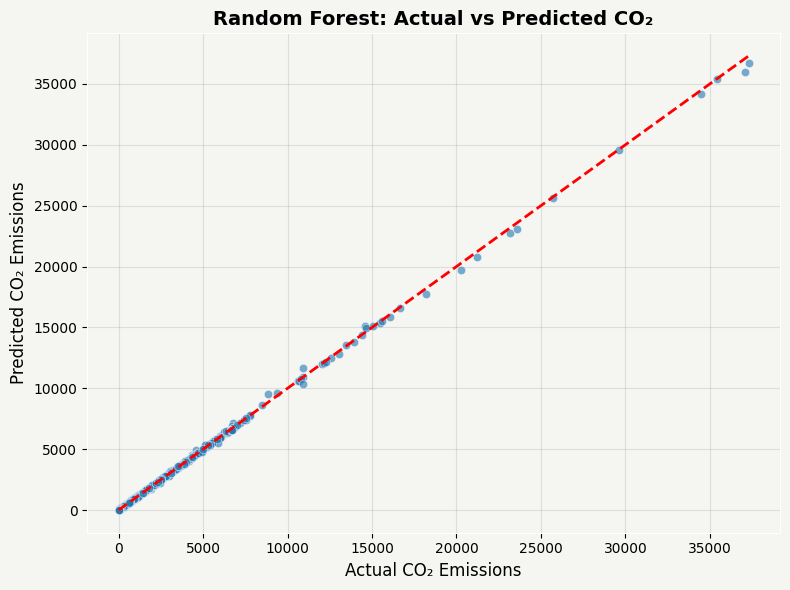

In [32]:
# Predictions
y_val_preds = rf.predict(X_val_scaled)

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=y_val_preds, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel("Actual CO₂ Emissions")
plt.ylabel("Predicted CO₂ Emissions")
plt.title("Random Forest: Actual vs Predicted CO₂")
plt.grid(True)
plt.tight_layout()
plt.show()

## 11. Evaluation on the Test Set

In [33]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_test_preds = rf.predict(X_test_scaled)

print("Random Forest Test Performance:")
print(f"  R² Score : {r2_score(y_test, y_test_preds):.4f}")
print(f"  MAE      : {mean_absolute_error(y_test, y_test_preds):.4f}")
print(f"  RMSE     : {np.sqrt(mean_squared_error(y_test, y_test_preds)):.4f}")

Random Forest Test Performance:
  R² Score : 0.9995
  MAE      : 6.0902
  RMSE     : 39.2332


## 12. Feature Importance (Random Forest - Base Model)

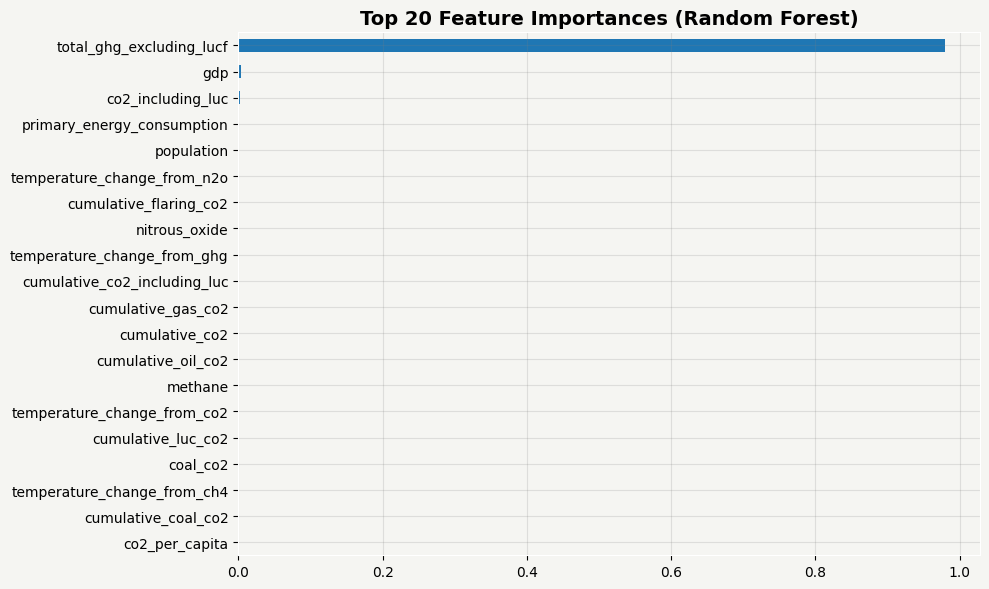

In [34]:
# Convert to Series
importances = pd.Series(rf.feature_importances_, index=X_train_scaled.columns)
importances_sorted = importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
importances_sorted.head(20).plot(kind='barh')
plt.title("Top 20 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Feature Importance
- **`total_ghg_excluding_lucf` accounts for >99% of predictive power**  
All other features contribute minimally to your Random Forest's performance.
- **`total_ghg_excluding_lucf` may essentially be a proxy for `co2` (target)**

## 2nd Variant
- Remove total_ghg_excluding_lucf

In [35]:
drop_feat = ['total_ghg_excluding_lucf']

# Drop from all datasets
X_train_dropped1 = X_train_scaled.drop(columns=drop_feat)
X_val_dropped1 = X_val_scaled.drop(columns=drop_feat)
X_test_dropped1 = X_test_scaled.drop(columns=drop_feat)

# Retrain and evaluate again
rf2 = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model("Random Forest (No GHG)", rf2, X_train_dropped1, y_train, X_val_dropped1, y_val)

# Test set
y_test_preds2 = rf2.predict(X_test_dropped1)
print("\nRandom Forest Test (No GHG) Performance:")
print(f"  R² Score : {r2_score(y_test, y_test_preds2):.4f}")
print(f"  MAE      : {mean_absolute_error(y_test, y_test_preds2):.4f}")
print(f"  RMSE     : {np.sqrt(mean_squared_error(y_test, y_test_preds2)):.4f}")


Random Forest (No GHG) Performance:
  R² Score : 0.9961
  MAE      : 9.1714
  RMSE     : 118.8003
  --------------------

Random Forest Test (No GHG) Performance:
  R² Score : 0.9923
  MAE      : 11.2779
  RMSE     : 160.7432


### Feature Importance for 2nd Variant model

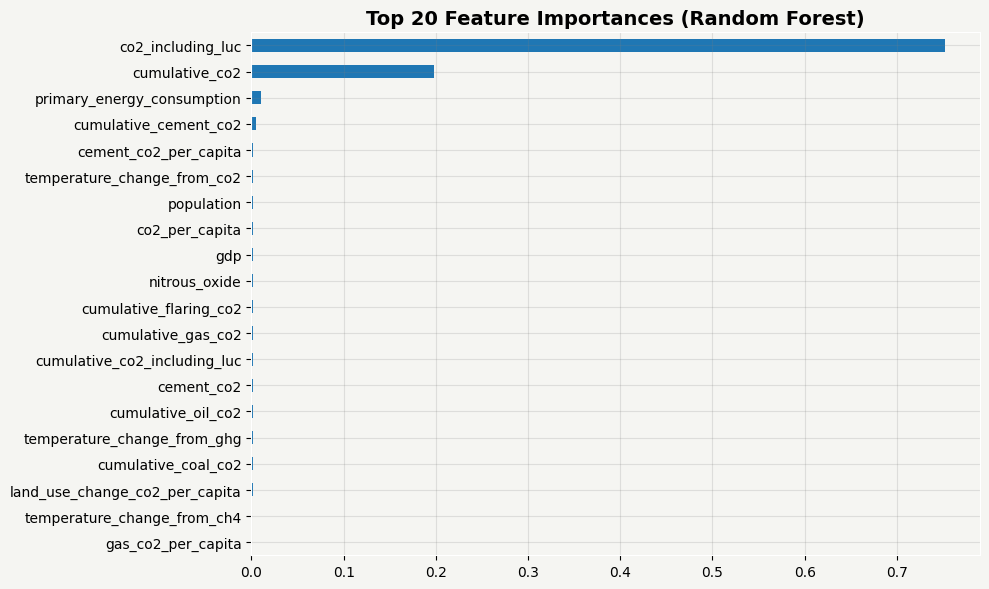

In [36]:
# Convert to Series
importances1 = pd.Series(rf2.feature_importances_, index=X_train_dropped1.columns)
importances_sorted1 = importances1.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
importances_sorted1.head(20).plot(kind='barh')
plt.title("Top 20 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

## 3rd Variant
- Remove `total_ghg_excluding_lucf` and `co2_including_luc`

In [37]:
drop_feat = ['total_ghg_excluding_lucf','co2_including_luc']

# Drop from all datasets
X_train_dropped = X_train_scaled.drop(columns=drop_feat)
X_val_dropped = X_val_scaled.drop(columns=drop_feat)
X_test_dropped = X_test_scaled.drop(columns=drop_feat)

# Retrain and evaluate again
rf3 = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model("Random Forest (No GHG)", rf3, X_train_dropped, y_train, X_val_dropped, y_val)

# Test set
y_test_preds3 = rf3.predict(X_test_dropped)
print("\nRandom Forest Test (No GHG) Performance:")
print(f"  R² Score : {r2_score(y_test, y_test_preds3):.4f}")
print(f"  MAE      : {mean_absolute_error(y_test, y_test_preds3):.4f}")
print(f"  RMSE     : {np.sqrt(mean_squared_error(y_test, y_test_preds3)):.4f}")


Random Forest (No GHG) Performance:
  R² Score : 0.9995
  MAE      : 7.7983
  RMSE     : 43.4675
  --------------------

Random Forest Test (No GHG) Performance:
  R² Score : 0.9990
  MAE      : 9.3020
  RMSE     : 56.6625


### Feature Importance for 3rd Variant model

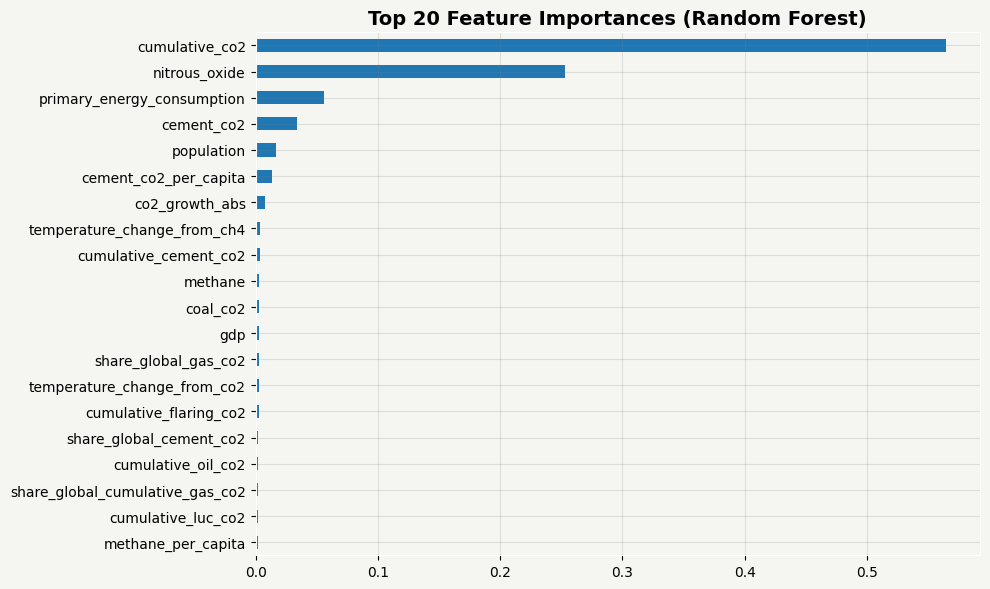

In [38]:
# Convert to Series
importances2 = pd.Series(rf3.feature_importances_, index=X_train_dropped.columns)
importances_sorted2 = importances2.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
importances_sorted2.head(20).plot(kind='barh')
plt.title("Top 20 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Feature Importance For Color-Blinds

c:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

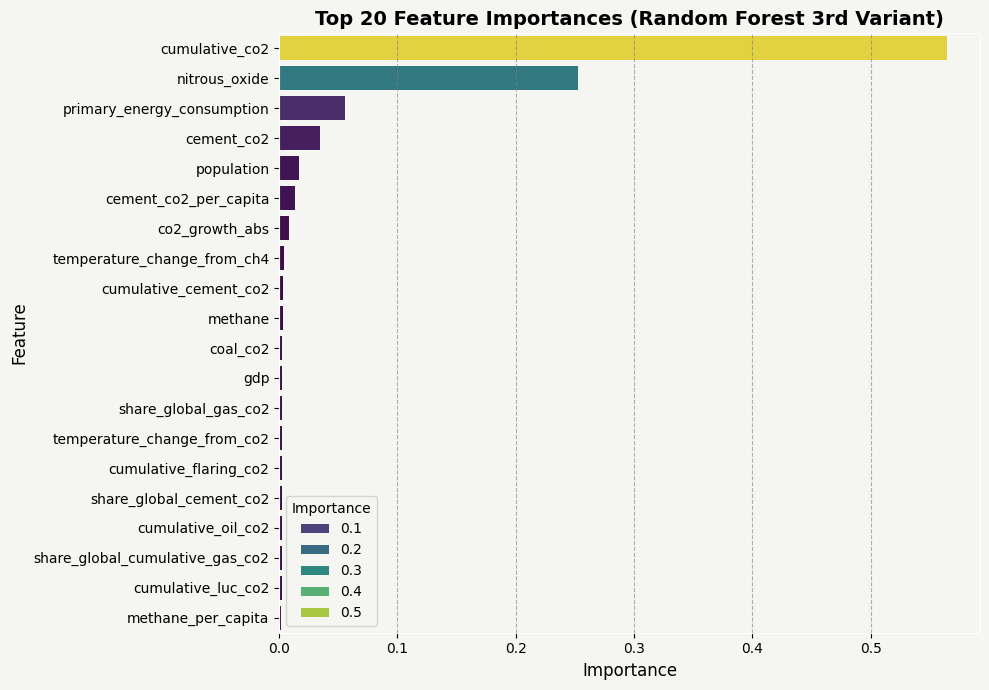

In [39]:
# Convert the Series to a DataFrame with explicit column names for seaborn
importances_df = importances_sorted2.reset_index()
importances_df.columns = ['Feature', 'Importance']

# Plot
plt.figure(figsize=(10, 7))

sns.barplot(data=importances_df.head(20), y='Feature', x='Importance', palette='viridis', hue = 'Importance')
plt.title('Top 20 Feature Importances (Random Forest 3rd Variant)', fontsize=14)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
# plt.savefig('Top 20 Feature Importances (Random Forest 3rd Variant).png', dpi=600, bbox_inches='tight', format='png')
plt.show()

### Residual & Prediction Visualization (3rd Variant)

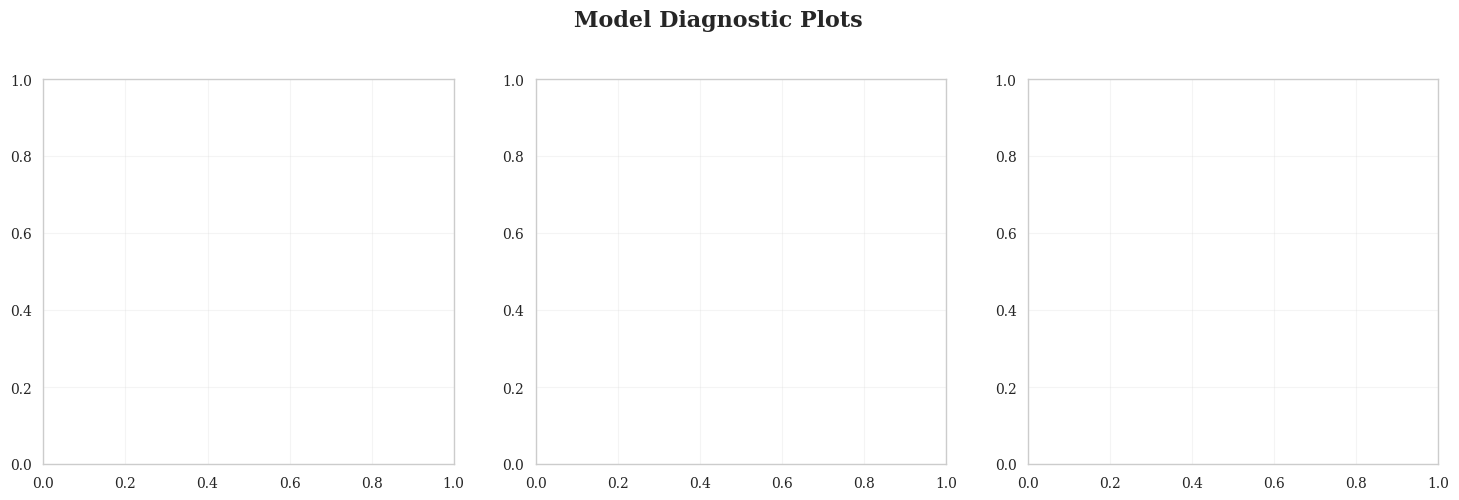

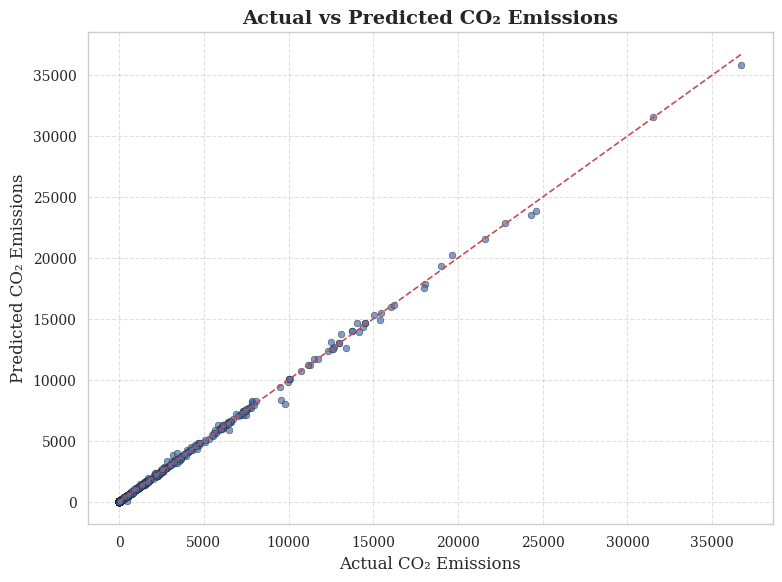

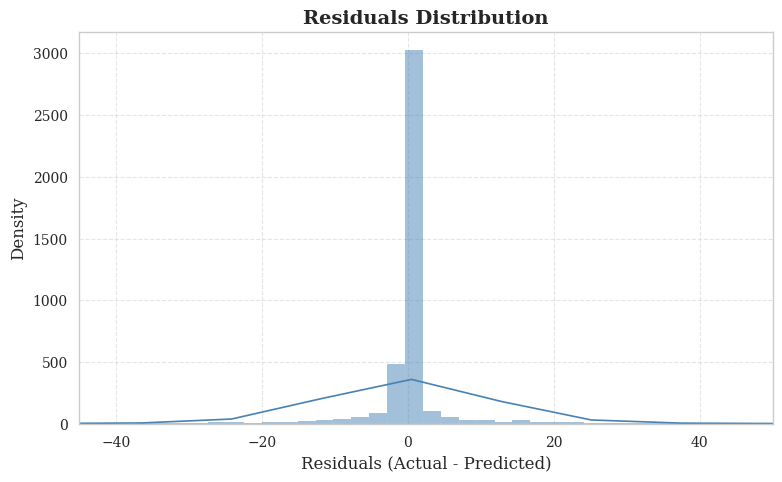

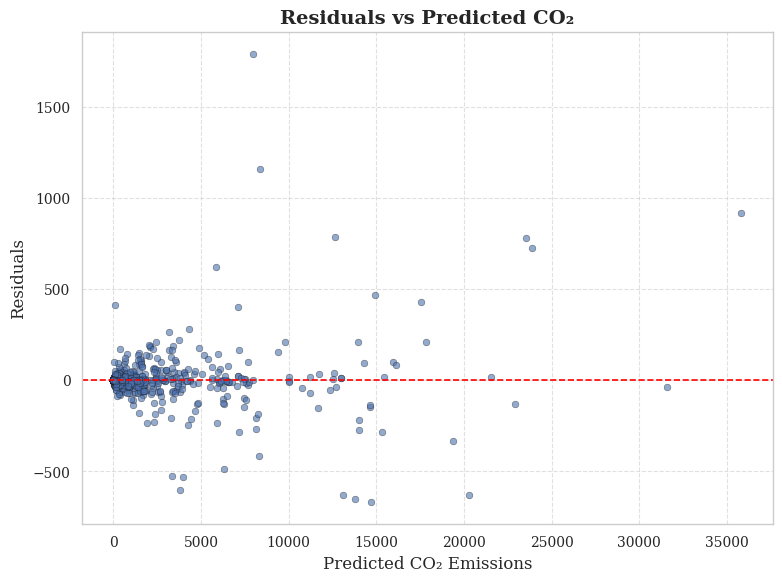

In [ ]:
residuals = y_test - y_test_preds3
# --- Set publication-quality style ---
sns.set_theme(style='whitegrid')
sns.set_context("paper", font_scale=1.3)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10



# Plot 1: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_preds3, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual CO₂ Emissions")
plt.ylabel("Predicted CO₂ Emissions")
plt.title("Actual vs Predicted CO₂ Emissions")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot 2: Residual Histogram
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=1000, color='steelblue')
plt.title("Residuals Distribution")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Density")
plt.xlim(-45, 50)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot 3: Residuals vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_preds3, y=residuals, alpha=0.6, edgecolor='k')
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted CO₂ Emissions")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted CO₂")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### Combined

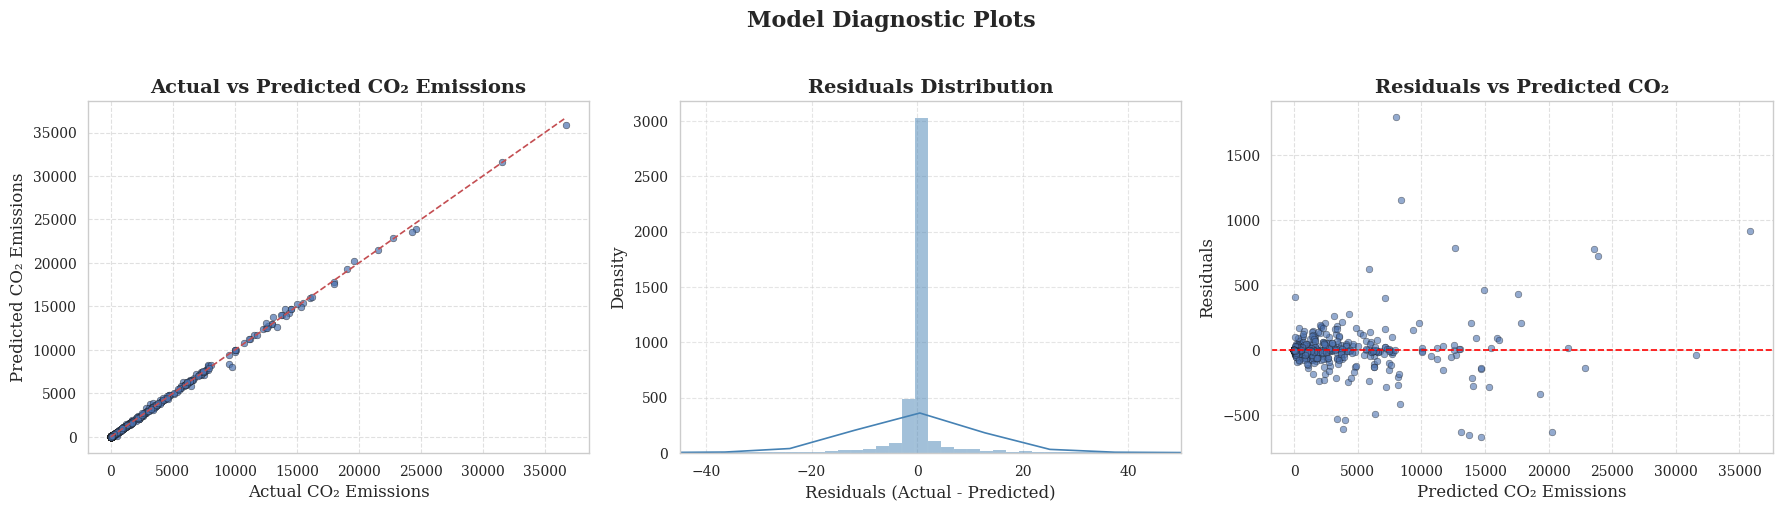

In [41]:
residuals = y_test - y_test_preds3
# --- Sets publication-quality style ---
sns.set_theme(style='whitegrid')
sns.set_context("paper", font_scale=1.3)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Creates figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Model Diagnostic Plots', y=1.02, fontsize=16, fontweight='bold')

# Plot 1: Actual vs Predicted
sns.scatterplot(x=y_test, y=y_test_preds3, alpha=0.7, edgecolor='k', ax=ax1)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
ax1.set_xlabel("Actual CO₂ Emissions")
ax1.set_ylabel("Predicted CO₂ Emissions")
ax1.set_title("Actual vs Predicted CO₂ Emissions")
ax1.grid(True, linestyle='--', alpha=0.6)

# Plot 2: Residual Histogram
sns.histplot(residuals, kde=True, bins=1000, color='steelblue', ax=ax2)
ax2.set_title("Residuals Distribution")
ax2.set_xlabel("Residuals (Actual - Predicted)")
ax2.set_ylabel("Density")
ax2.set_xlim(-45, 50)
ax2.grid(True, linestyle='--', alpha=0.5)

# Plot 3: Residuals vs Predicted
sns.scatterplot(x=y_test_preds3, y=residuals, alpha=0.6, edgecolor='k', ax=ax3)
ax3.axhline(0, linestyle='--', color='red')
ax3.set_xlabel("Predicted CO₂ Emissions")
ax3.set_ylabel("Residuals")
ax3.set_title("Residuals vs Predicted CO₂")
ax3.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
# plt.savefig('Residuals vs Predicted CO₂.png', dpi=600, bbox_inches='tight', format='png')
plt.show()

## Cross-validation (CV) - A Double Check for Performance
**Why using it?**
- Because it helps in proving that the model isn’t just good on one random train-test split, but performs consistently.

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error


# 1. Drop GHG features from X_train
drop_feat = ['total_ghg_excluding_lucf', 'co2_including_luc']
X_train_cv = X_train_scaled.drop(columns=drop_feat)

# 2. Define model
rf_final = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# 3. Define scoring metrics
scoring = {
    'r2': 'r2',
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error'
}

# 4. Perform cross-validation
cv_results = cross_validate(
    rf_final,
    X_train_cv,
    y_train,
    cv=5,
    scoring=scoring,
    return_train_score=True
)

# 5. Display results
print("5-Fold Cross-Validation Results (Random Forest w/o GHG):")
print(f"Avg Train R² :  {cv_results['train_r2'].mean():.4f}")
print(f"Avg Val R²   :  {cv_results['test_r2'].mean():.4f}")
print(f"Avg MAE      : {-cv_results['test_mae'].mean():.2f}")
print(f"Avg RMSE     : {-cv_results['test_rmse'].mean():.2f}")


5-Fold Cross-Validation Results (Random Forest w/o GHG):
Avg Train R² :  0.9998
Avg Val R²   :  0.9988
Avg MAE      : 11.20
Avg RMSE     : 68.13


### Interpretation
- This confirms that removing the `GHG indicators` didn’t ruin the model — it still generalizes beautifully.
- It is not overfitting (train and val R² are both high and close).
- The model is robust.

## 4th Variant  (Not Important - Just Testing More)


Validation Performance (Random Forest, GHG Features Dropped):
  R² Score : 0.9995
  MAE      : 7.2948
  RMSE     : 42.1438

Test Performance (Random Forest, GHG Features Dropped):
  R² Score : 0.9991
  MAE      : 9.0235
  RMSE     : 53.7056


c:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


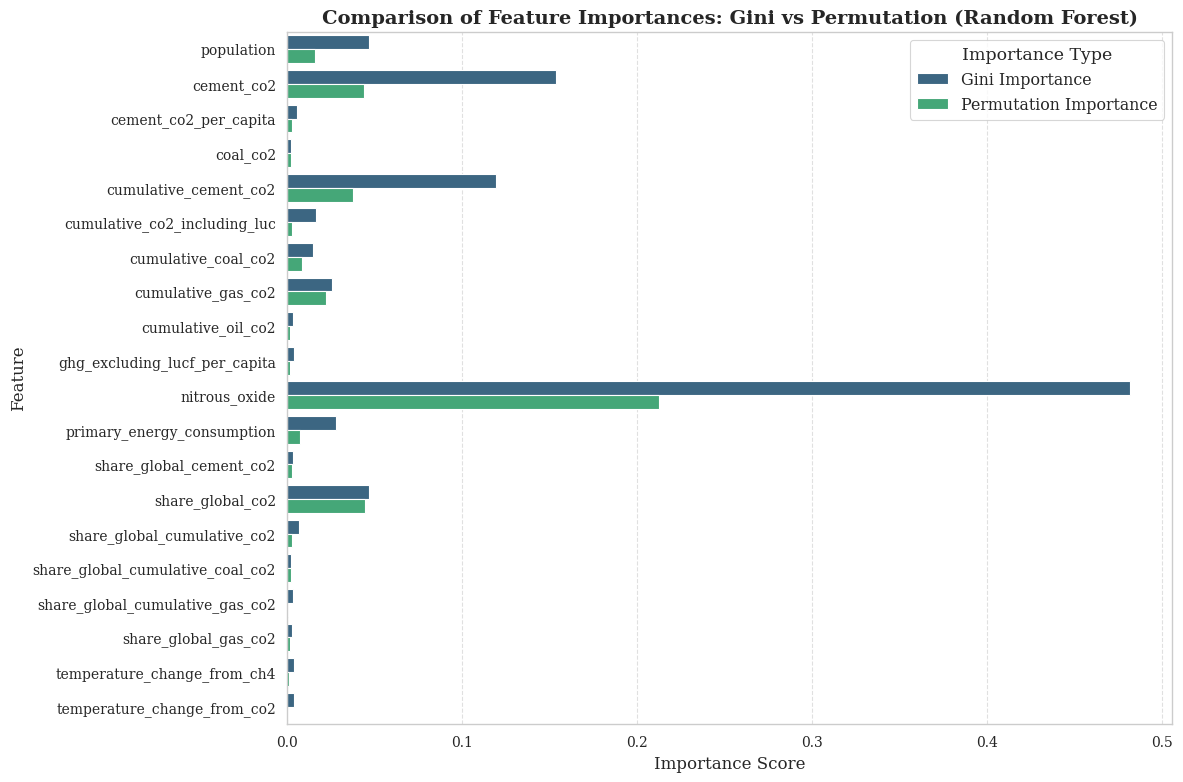

In [ ]:
from sklearn.inspection import permutation_importance

# === STEP 1: Drop less important GHG features ===
drop_feat = ['total_ghg_excluding_lucf', 'co2_including_luc', 'cumulative_co2']

X_train_dropped4 = X_train_scaled.drop(columns=drop_feat)
X_val_dropped4 = X_val_scaled.drop(columns=drop_feat)
X_test_dropped4 = X_test_scaled.drop(columns=drop_feat)

# === STEP 2: Train Random Forest on original (non-PCA) features ===
rf4_orig = RandomForestRegressor(n_estimators=100, random_state=42)
rf4_orig.fit(X_train_dropped4, y_train)

# === STEP 3: Evaluate model ===
val_preds = rf4_orig.predict(X_val_dropped4)
print("\nValidation Performance (Random Forest, GHG Features Dropped):")
print(f"  R² Score : {r2_score(y_val, val_preds):.4f}")
print(f"  MAE      : {mean_absolute_error(y_val, val_preds):.4f}")
print(f"  RMSE     : {np.sqrt(mean_squared_error(y_val, val_preds)):.4f}")

# Test evaluation
y_test_preds4 = rf4_orig.predict(X_test_dropped4)
print("\nTest Performance (Random Forest, GHG Features Dropped):")
print(f"  R² Score : {r2_score(y_test, y_test_preds4):.4f}")
print(f"  MAE      : {mean_absolute_error(y_test, y_test_preds4):.4f}")
print(f"  RMSE     : {np.sqrt(mean_squared_error(y_test, y_test_preds4)):.4f}")

# === STEP 4: Compute Gini (model-based) and Permutation importances ===
gini_importances = pd.Series(rf4_orig.feature_importances_, index=X_train_dropped4.columns, name='Gini Importance')

perm_result = permutation_importance(rf4_orig, X_train_dropped4, y_train, n_repeats=10, random_state=42, n_jobs=-1)
perm_importances = pd.Series(perm_result.importances_mean, index=X_train_dropped4.columns, name='Permutation Importance')

# === STEP 5: Combine importances for plotting ===
importance_df = pd.concat([gini_importances, perm_importances], axis=1).reset_index()
importance_df = importance_df.rename(columns={'index': 'Feature'})

# Reshape for seaborn
importance_df = importance_df.melt(id_vars='Feature', var_name='Method', value_name='Importance')

# Focus on top 20 features (by average importance)
importance_df['MeanImportance'] = importance_df.groupby('Feature')['Importance'].transform('mean')
top_features = importance_df.sort_values('MeanImportance', ascending=False)['Feature'].unique()[:20]
importance_df = importance_df[importance_df['Feature'].isin(top_features)]

# === STEP 6: Plot ===
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df, y='Feature', x='Importance', hue='Method', palette='viridis')
plt.title('Comparison of Feature Importances: Gini vs Permutation (Random Forest)', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.legend(title='Importance Type')
plt.tight_layout()
plt.show()


### PCA - To check Feature Variance

C:\Users\PMLS\AppData\Local\Temp\ipykernel_17860\3049774099.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loading_df, x='Feature', y='Loading', palette='coolwarm')
c:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_ke

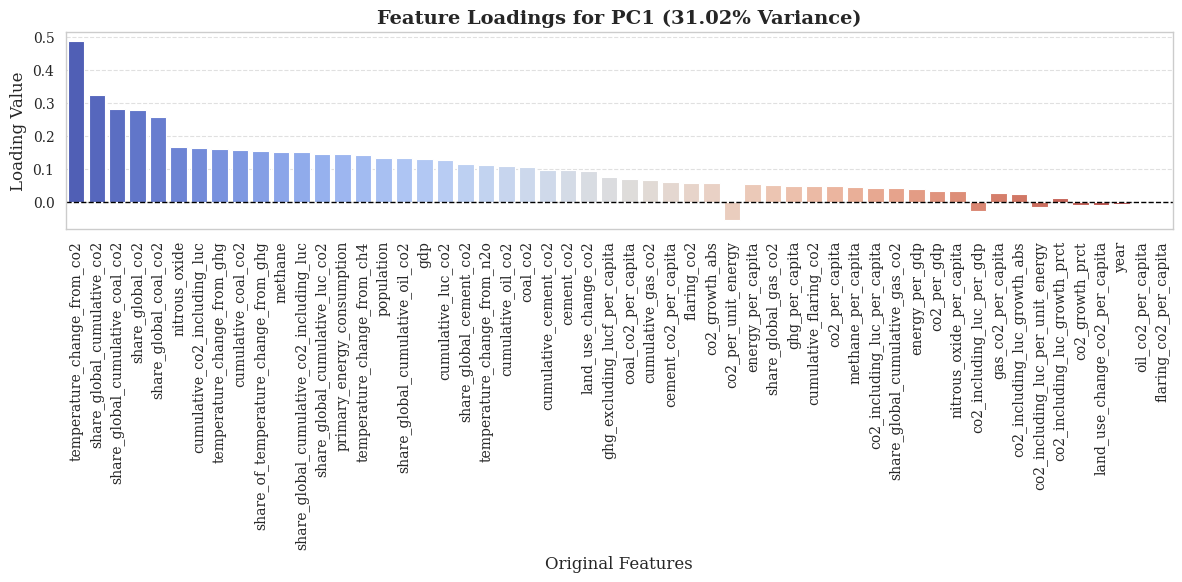

In [48]:
from sklearn.decomposition import PCA
# Apply PCA on quantile-transformed data
pca = PCA()
X_pca = pca.fit_transform(X_train_dropped4)

# Choose the principal component to visualize (e.g., PC1)
pc_index = 0  # PC1

# Get feature names
feature_names = X_train_dropped4.columns

# Get loadings (coefficients) for PC1
loadings = pca.components_[pc_index]

# Get explained variance ratio for each PC
explained_var = pca.explained_variance_ratio_ * 100  # as percentage

# Create DataFrame for plotting
loading_df = pd.DataFrame({
    'Feature': feature_names,
    'Loading': loadings,
    'Absolute Loading': np.abs(loadings)
}).sort_values('Absolute Loading', ascending=False)

# Plot bar chart of loadings
plt.figure(figsize=(12, 6))
sns.barplot(data=loading_df, x='Feature', y='Loading', palette='coolwarm')
plt.xticks(rotation=90)
plt.title(f'Feature Loadings for PC{pc_index+1} ({explained_var[pc_index]:.2f}% Variance)', fontsize=14)
plt.xlabel('Original Features')
plt.ylabel('Loading Value')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# Optional: Add horizontal line at 0
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()
